In [1]:
from IPython.display import Image

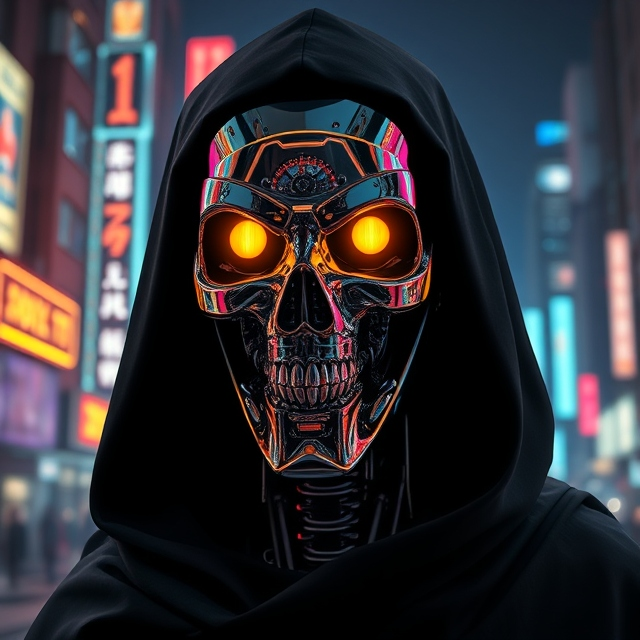

In [2]:
Image(filename = 'HNN.jpeg')

# Hacking Neural Networks

#### Author: [Kevin Thomas](mailto:ket189@pitt.edu)

Welcome to the **Hacking Neural Networks** notebook! This notebook is designed to provide a detailed, step-by-step walkthrough of the inner workings of a simple neural network. The goal is to demystify the calculations behind neural networks by breaking them down into understandable components, including forward propagation, backpropagation, gradient calculations, and parameter updates.

## Overview

The focus of this repository is to make neural networks accessible and hackable. We emphasize **hands-on exploration** of every step in the network's operations, highlighting the following:
- **STEP 1: FORWARD PASS**: How the network computes outputs.
- **STEP 2: BACK PROPAGATION**: Deriving gradients for each parameter.
- **STEP 3: OPTIMIZATION / GRADIENT DESCENT**: Updating weights and biases using gradient descent.

## Network Architecture

The neural network we analyze consists of the following components:

- **Inputs:** Two input neurons: $x_1$ and $x_2$.
- **Weights:** $w_1$ and $w_2$, which connect the inputs to the output neuron.
- **Bias:** $b$, an additive term to the linear combination.
- **Activation Function:** $\tanh$, which introduces non-linearity.
- **Output:** $o$, the result of the activation function.

### Initial Setup

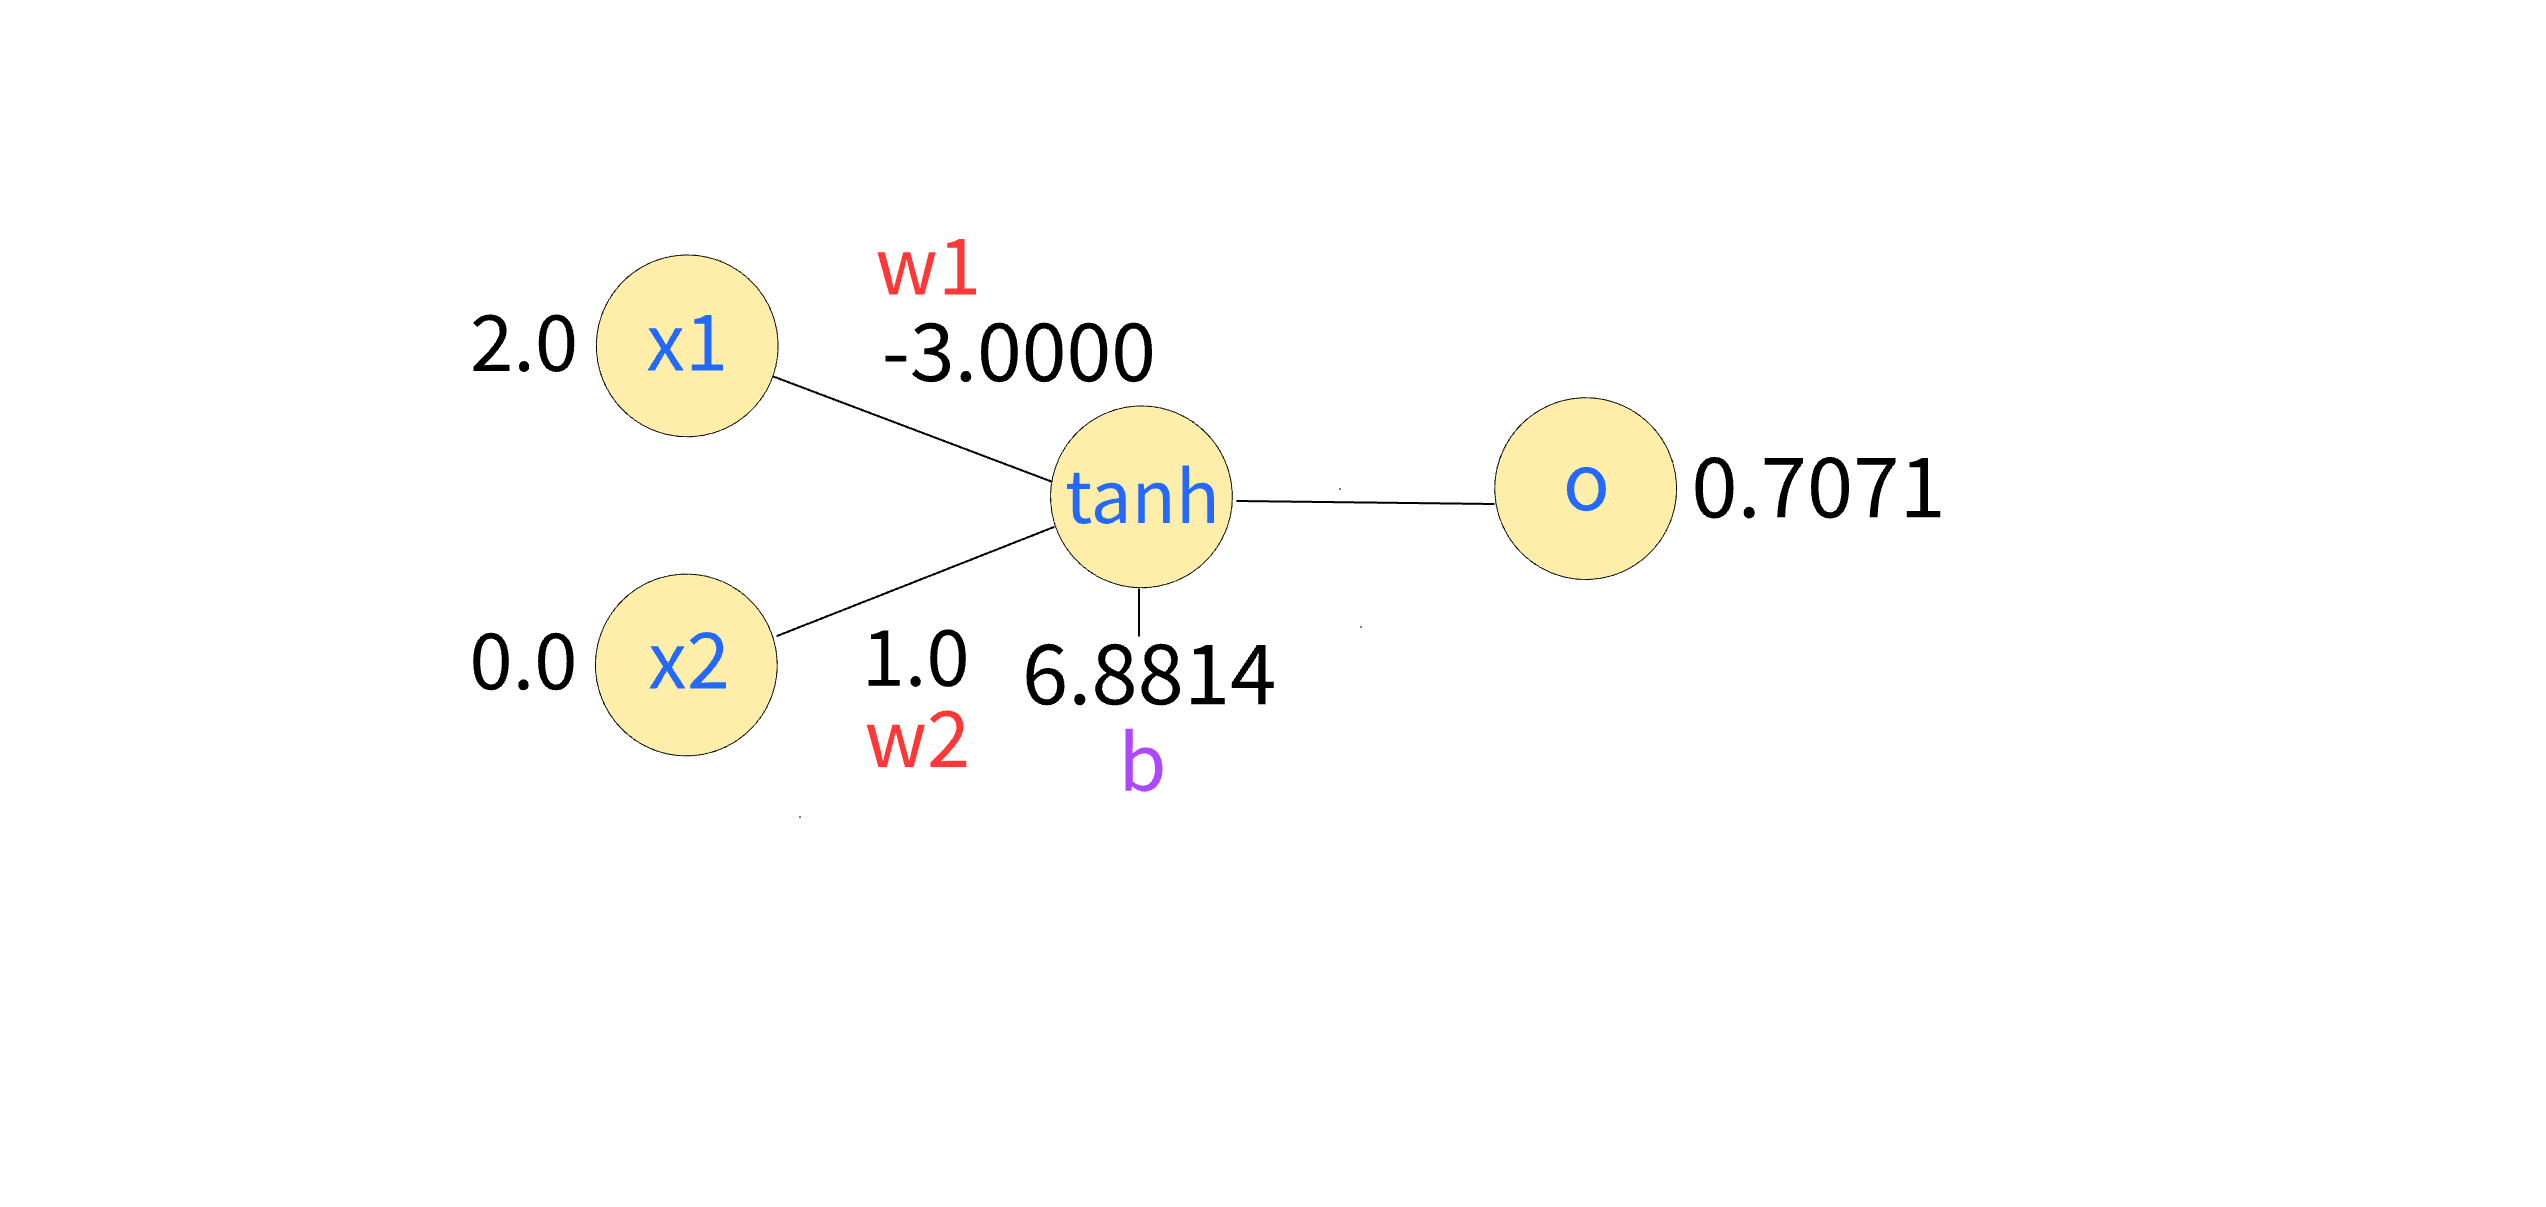

In [3]:
Image(filename = 'ae0.png')

The initial weights, biases, and outputs are calculated based on the equations:
- Linear Combination: $n = x_1 \cdot w_1 + x_2 \cdot w_2 + b$
- Activation: $o = \tanh(n)$

## Gradient Calculations

### Backpropagation
The gradients for each parameter are calculated as follows:
- Gradient of the loss with respect to $o$: $\frac{\partial L}{\partial o}$
- Gradient of $o$ with respect to $n$: $\frac{\partial o}{\partial n} = 1 - o^2$
- Gradients for $w_1, w_2,$ and $b$:
  $$
  \frac{\partial L}{\partial w_1} = x_1 \cdot (1 - o^2) \cdot \frac{\partial L}{\partial o}, \quad
  \frac{\partial L}{\partial w_2} = x_2 \cdot (1 - o^2) \cdot \frac{\partial L}{\partial o}, \quad
  \frac{\partial L}{\partial b} = (1 - o^2) \cdot \frac{\partial L}{\partial o}
  $$

### Optimization
The parameters are updated using gradient descent:
$$
w_1 = w_1 - \eta \cdot \frac{\partial L}{\partial w_1}, \quad
w_2 = w_2 - \eta \cdot \frac{\partial L}{\partial w_2}, \quad
b = b - \eta \cdot \frac{\partial L}{\partial b}
$$

Where $\eta$ is the learning rate.

## Visualization

This repository includes **neural network diagrams** for visualizing the network's evolution across multiple epochs. Each diagram shows:
- Input values: $x_1, x_2$
- Weights: $w_1, w_2$
- Bias: $b$
- Intermediate value: $n$
- Output: $o$

Each epoch updates these values and recalculates the output based on the updated weights, biases, and gradients. The **10 diagrams** in this repository show the progression of the network over time.

## Install Libraries

In [4]:
!pip install torch

## Imports

In [5]:
import torch

## Set Random Seed / Reproducibility

In [6]:
torch.manual_seed(42)

## Define Input `x1` w/ Gradients Enabled

In [7]:
x1 = torch.tensor([2.0], dtype=torch.double, requires_grad=True) 

In [8]:
x1

tensor([2.], dtype=torch.float64, requires_grad=True)

In [9]:
x1.ndim

1

In [10]:
x1.shape

torch.Size([1])

## Define Input `x2` w/ Gradients Enabled

In [11]:
x2 = torch.tensor([0.0], dtype=torch.double, requires_grad=True)

In [12]:
x2

tensor([0.], dtype=torch.float64, requires_grad=True)

In [13]:
x2.ndim

1

In [14]:
x2.shape

torch.Size([1])

## Define Initial Weight `w1` w/ Gradients Enabled

In [15]:
w1 = torch.tensor([-3.0], dtype=torch.double, requires_grad=True)

In [16]:
w1

tensor([-3.], dtype=torch.float64, requires_grad=True)

In [17]:
w1.ndim

1

In [18]:
w1.shape

torch.Size([1])

## Define Initial Weight `w2` w/ Gradients Enabled

In [19]:
w2 = torch.tensor([1.0], dtype=torch.double, requires_grad=True) 

In [20]:
w2

tensor([1.], dtype=torch.float64, requires_grad=True)

In [21]:
w2.ndim

1

In [22]:
w2.shape

torch.Size([1])

## Define Initial Bias `b` w/ Gradients Enabled

In [23]:
b = torch.tensor([6.8814], dtype=torch.double, requires_grad=True)

In [24]:
b

tensor([6.8814], dtype=torch.float64, requires_grad=True)

In [25]:
b.ndim

1

In [26]:
b.shape

torch.Size([1])

## Define Learning Rate

In [27]:
learning_rate = 0.01  # step size for gradient descent

## Define Number of Epochs

In [28]:
epochs = 10  # number of iterations

## Define Target Value

In [29]:
target = torch.tensor([0.0], dtype=torch.double)  # desired output value

In [30]:
target

tensor([0.], dtype=torch.float64)

In [31]:
target.ndim

1

In [32]:
target.shape

torch.Size([1])

## Training Loop

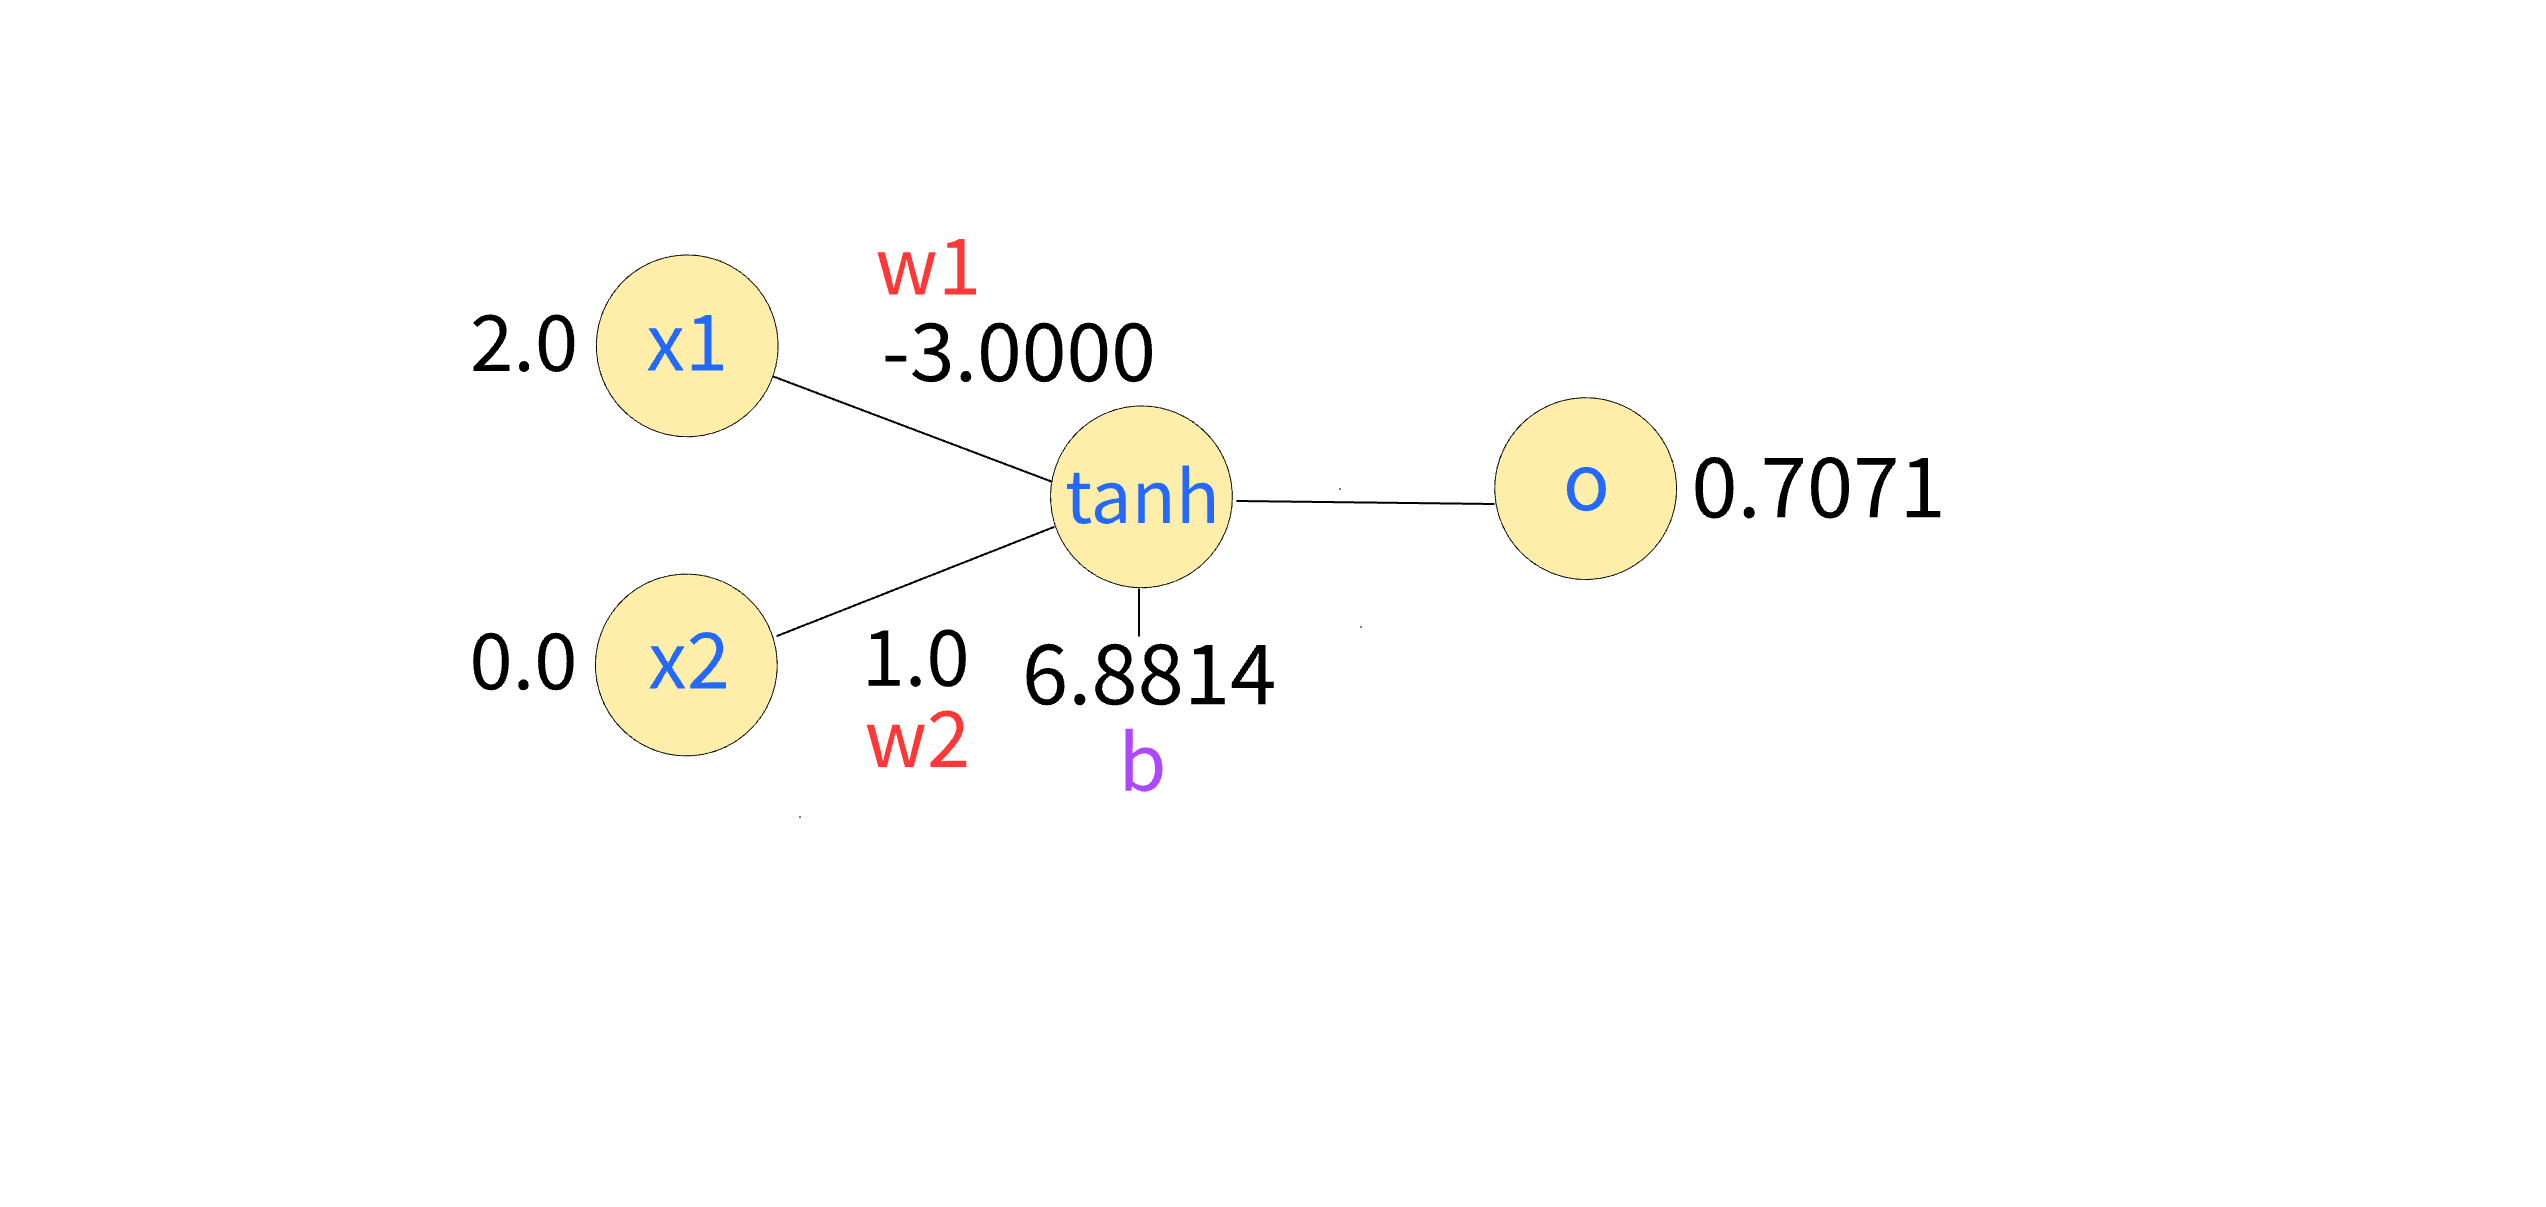

EPOCH 1
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.000000, w2 = 1.000000, b = 6.881400
STEP 1: FORWARD PASS
  forward pass:
    n = 0.881400 (n = 2.0*-3.0 + 0.0*1.0 + 6.8814)
    o = 0.707120 (o = tanh(0.8814000000000002))
    loss = 0.250009 (Loss = 0.5 * (0.7071199874301227 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.707094 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.353547 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.007071 (w1 = w1 - lr * w1.grad = -3.00707093574203 - 0.01 * 0.7070935742030305)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.877865 (b = b - lr * b.grad = 6.877864532128985 - 0.01 * 0.35354678710151527)
  updated parameters:
    w1 

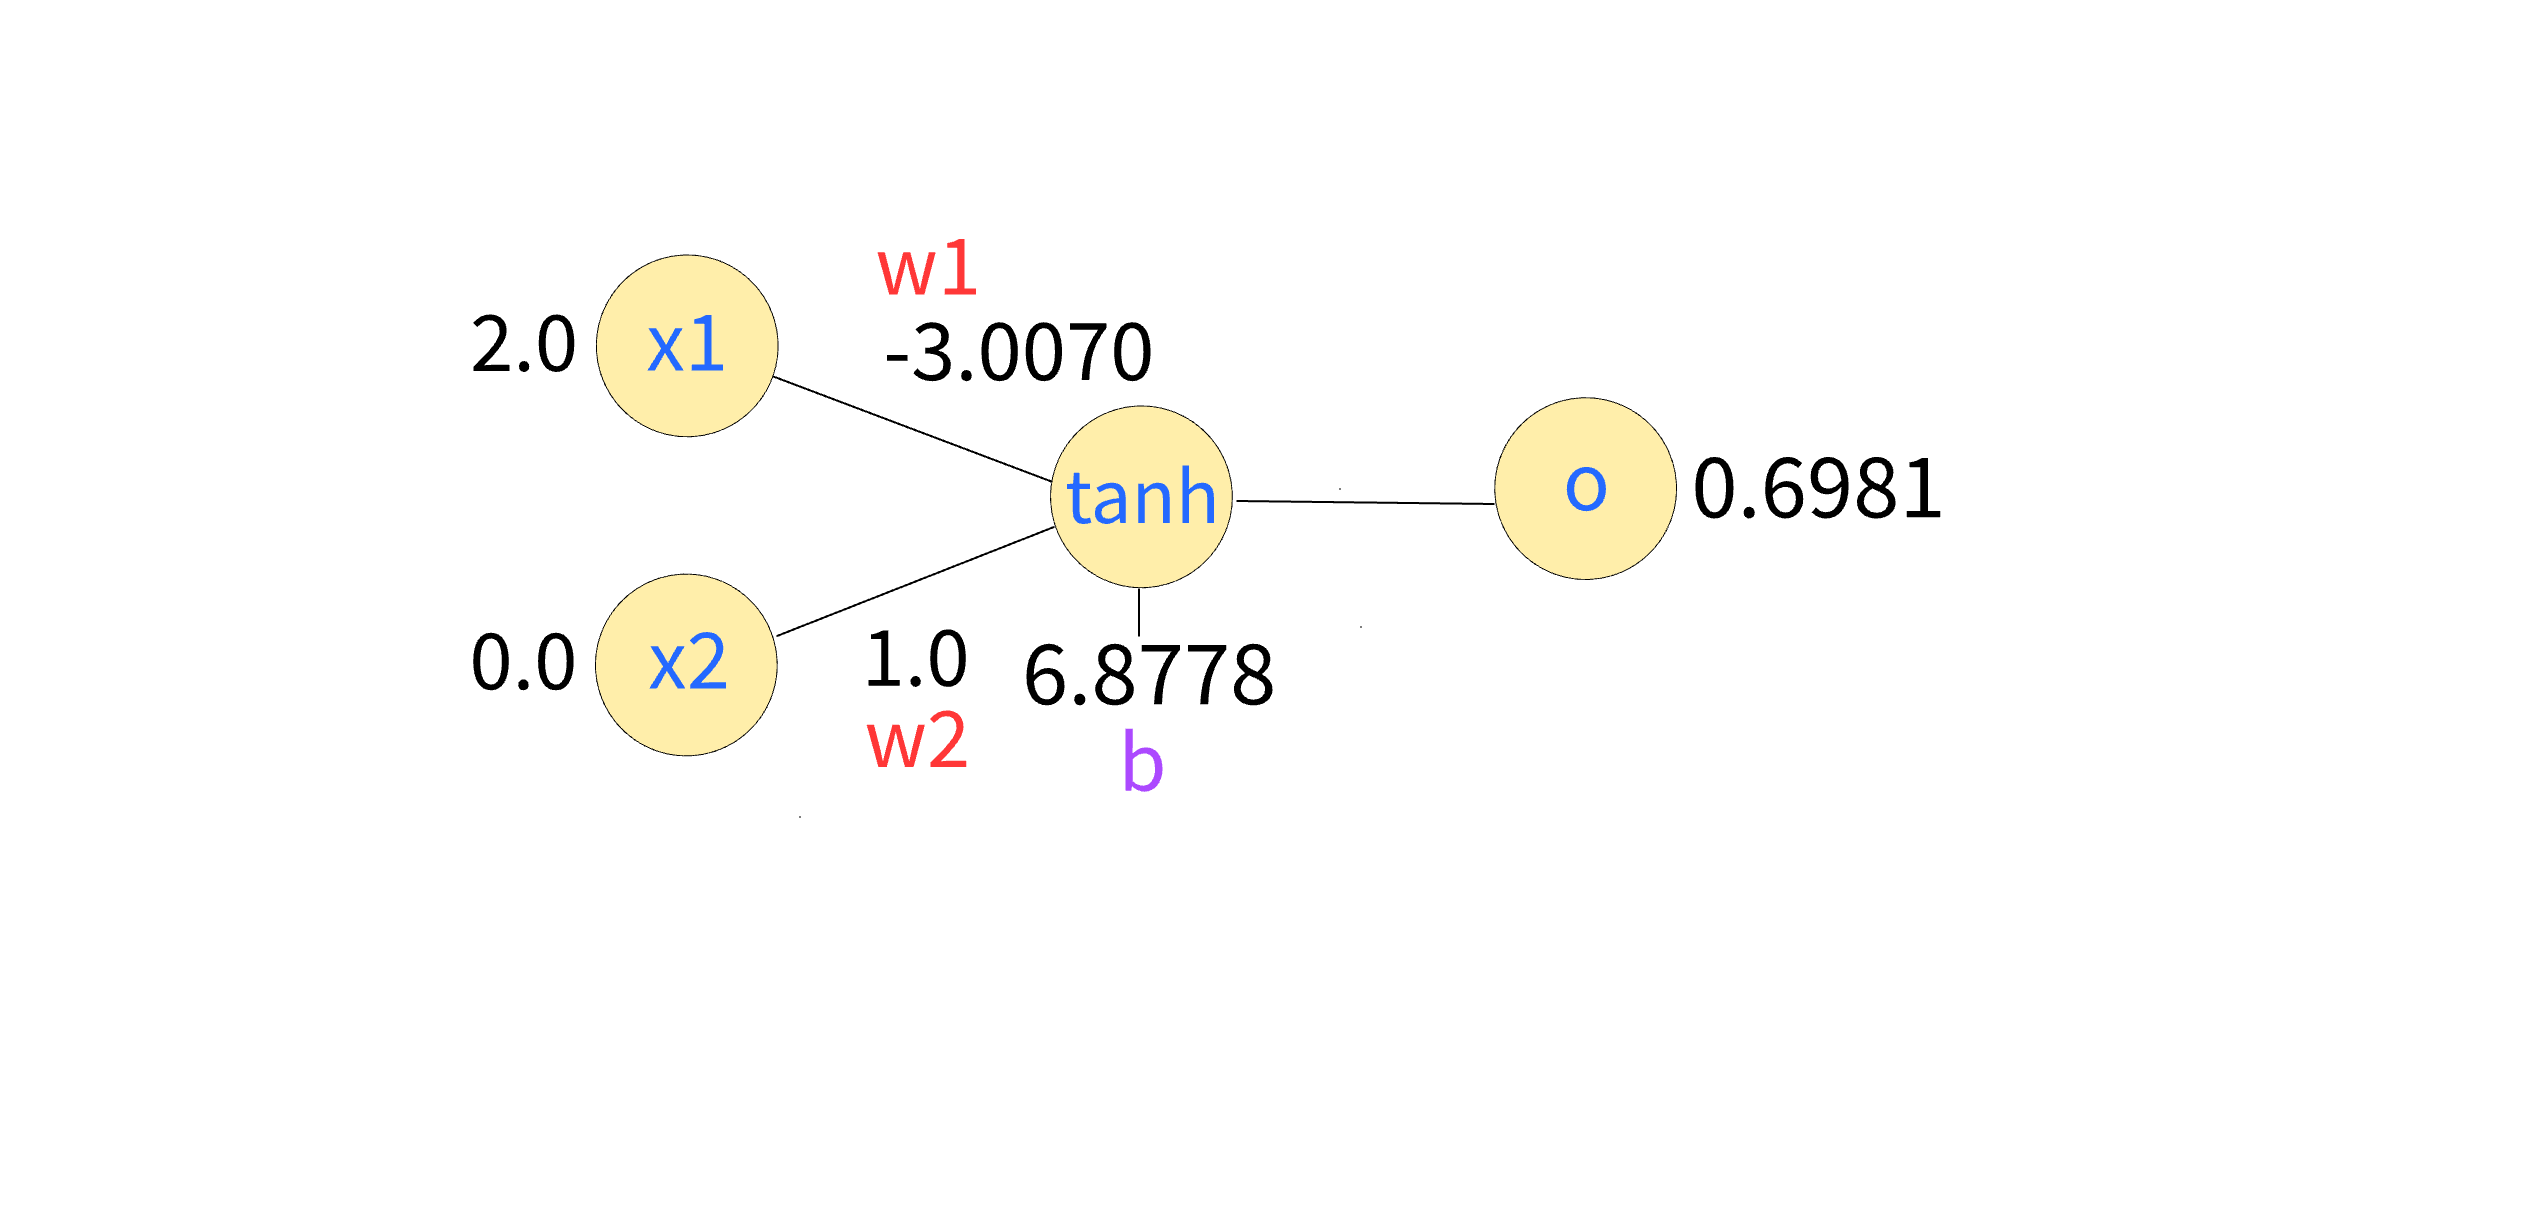

EPOCH 2
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.007071, w2 = 1.000000, b = 6.877865
STEP 1: FORWARD PASS
  forward pass:
    n = 0.863723 (n = 2.0*-3.00707093574203 + 0.0*1.0 + 6.877864532128985)
    o = 0.698171 (o = tanh(0.8637226606449246))
    loss = 0.243721 (Loss = 0.5 * (0.6981707141514888 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.715705 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.357853 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.014228 (w1 = w1 - lr * w1.grad = -3.0142279906073903 - 0.01 * 0.7157054865360251)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.874286 (b = b - lr * b.grad = 6.874286004696305 - 0.01 * 0.35785274326801253)
  u

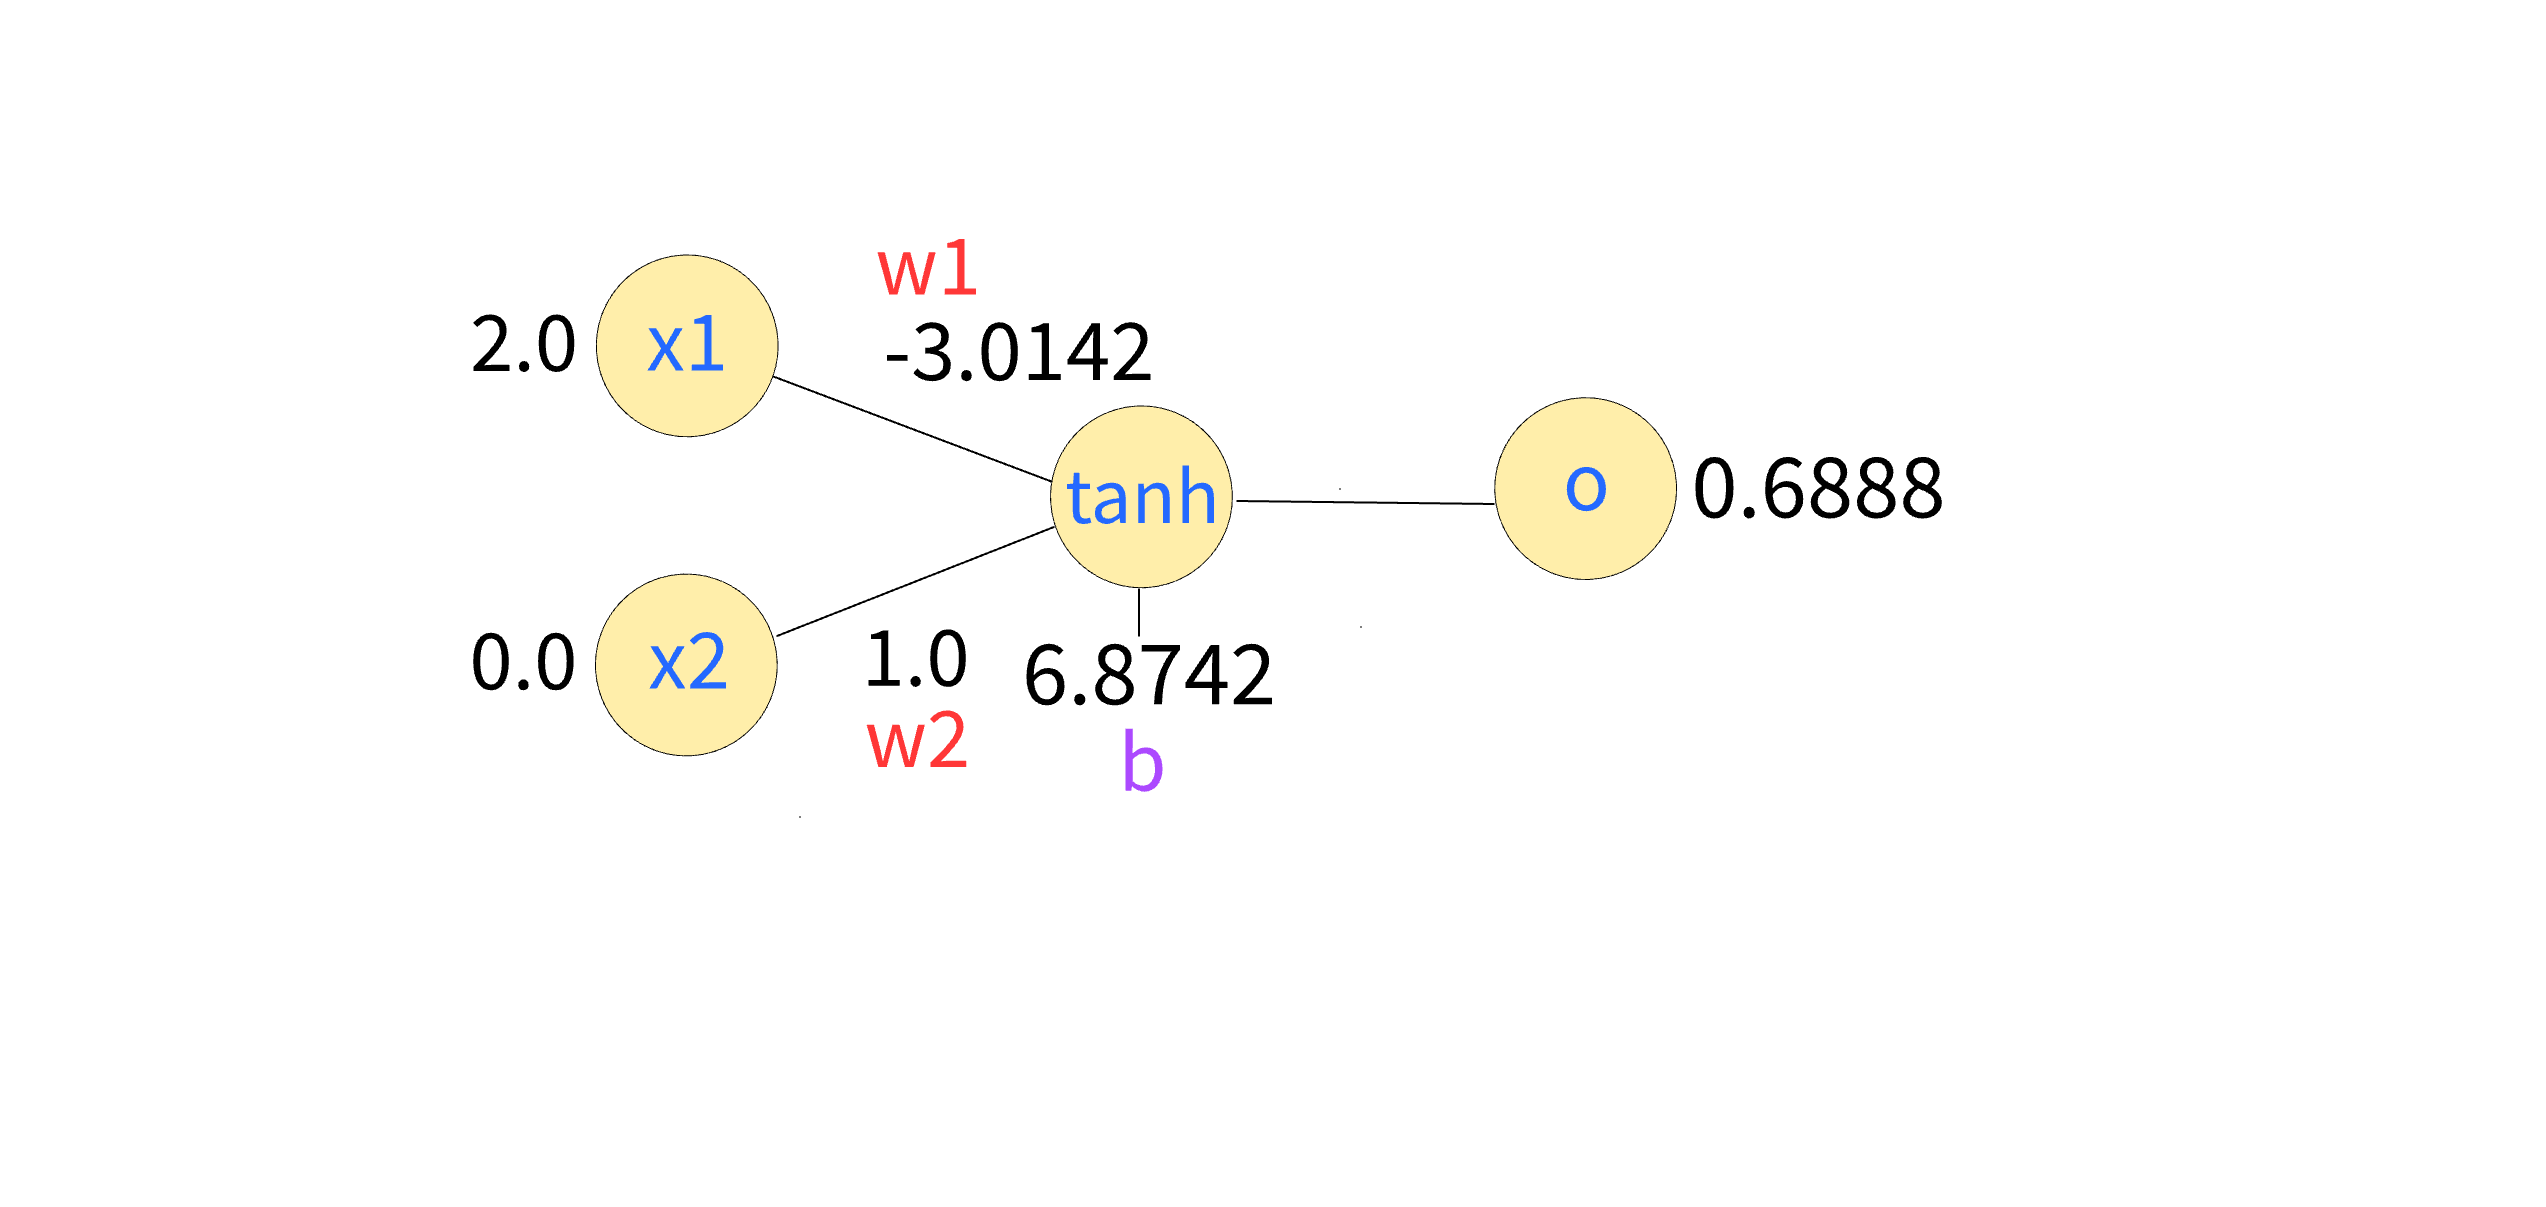

EPOCH 3
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.014228, w2 = 1.000000, b = 6.874286
STEP 1: FORWARD PASS
  forward pass:
    n = 0.845830 (n = 2.0*-3.0142279906073903 + 0.0*1.0 + 6.874286004696305)
    o = 0.688885 (o = tanh(0.8458300234815246))
    loss = 0.237281 (Loss = 0.5 * (0.6888846949435228 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.723932 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.361966 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.021467 (w1 = w1 - lr * w1.grad = -3.0214673128405685 - 0.01 * 0.7239322233178187)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.870666 (b = b - lr * b.grad = 6.870666343579716 - 0.01 * 0.36196611165890935)
 

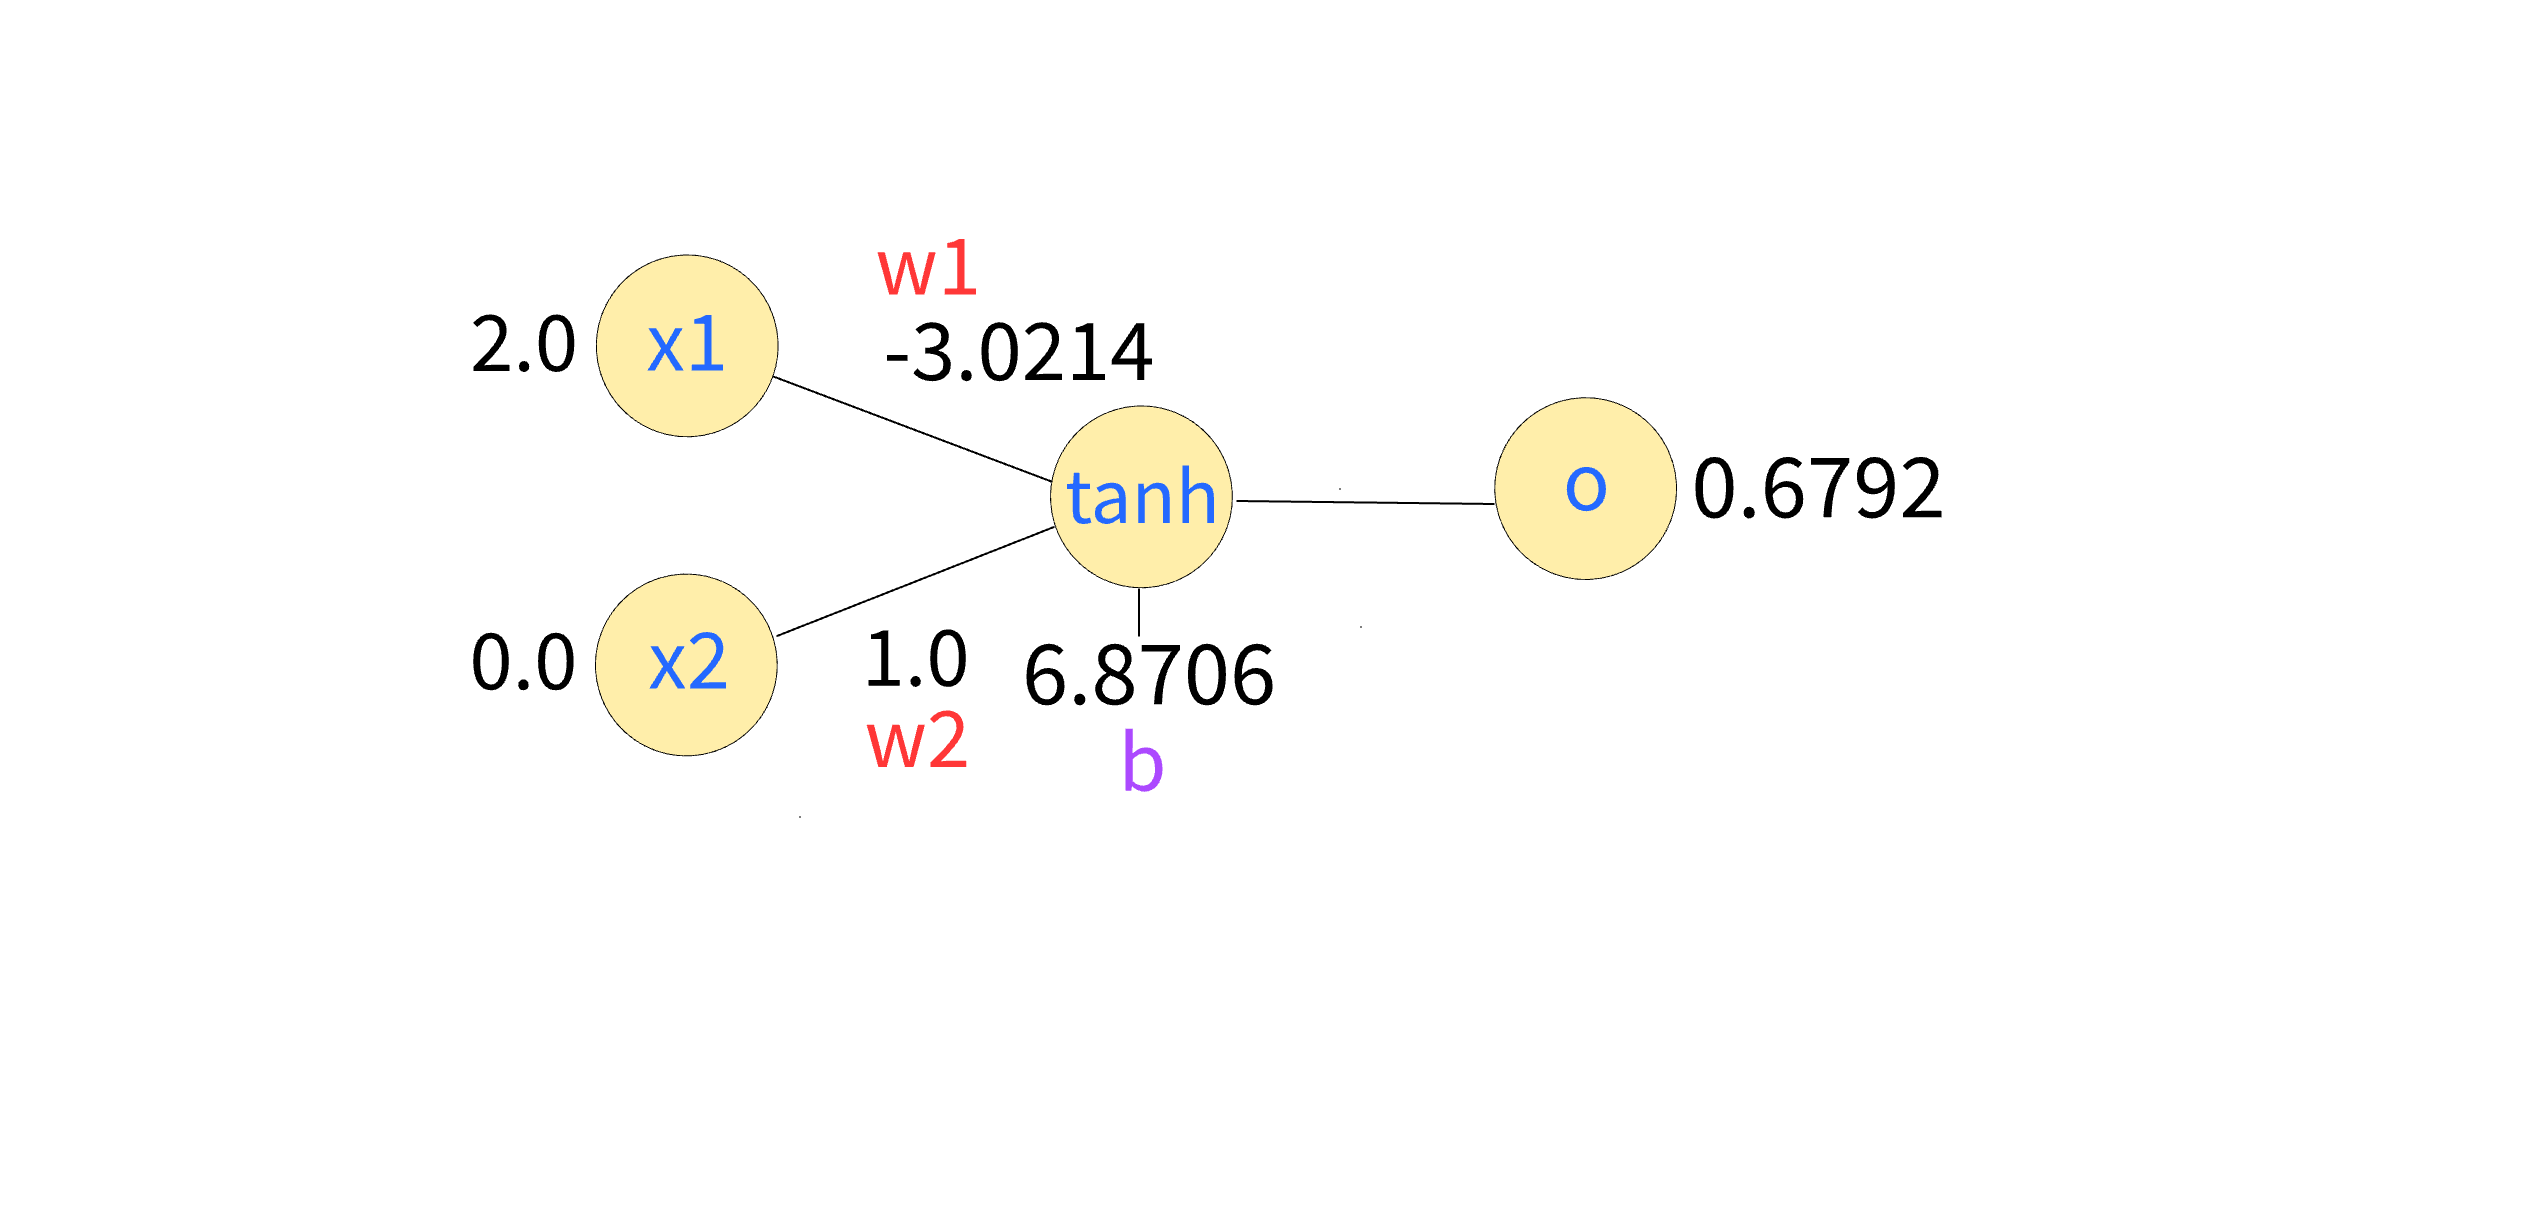

EPOCH 4
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.021467, w2 = 1.000000, b = 6.870666
STEP 1: FORWARD PASS
  forward pass:
    n = 0.827732 (n = 2.0*-3.0214673128405685 + 0.0*1.0 + 6.870666343579716)
    o = 0.679256 (o = tanh(0.8277317178985788))
    loss = 0.230694 (Loss = 0.5 * (0.6792561658373667 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.731710 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.365855 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.028784 (w1 = w1 - lr * w1.grad = -3.0287844105263533 - 0.01 * 0.7317097685784673)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.867008 (b = b - lr * b.grad = 6.867007794736823 - 0.01 * 0.36585488428923363)
 

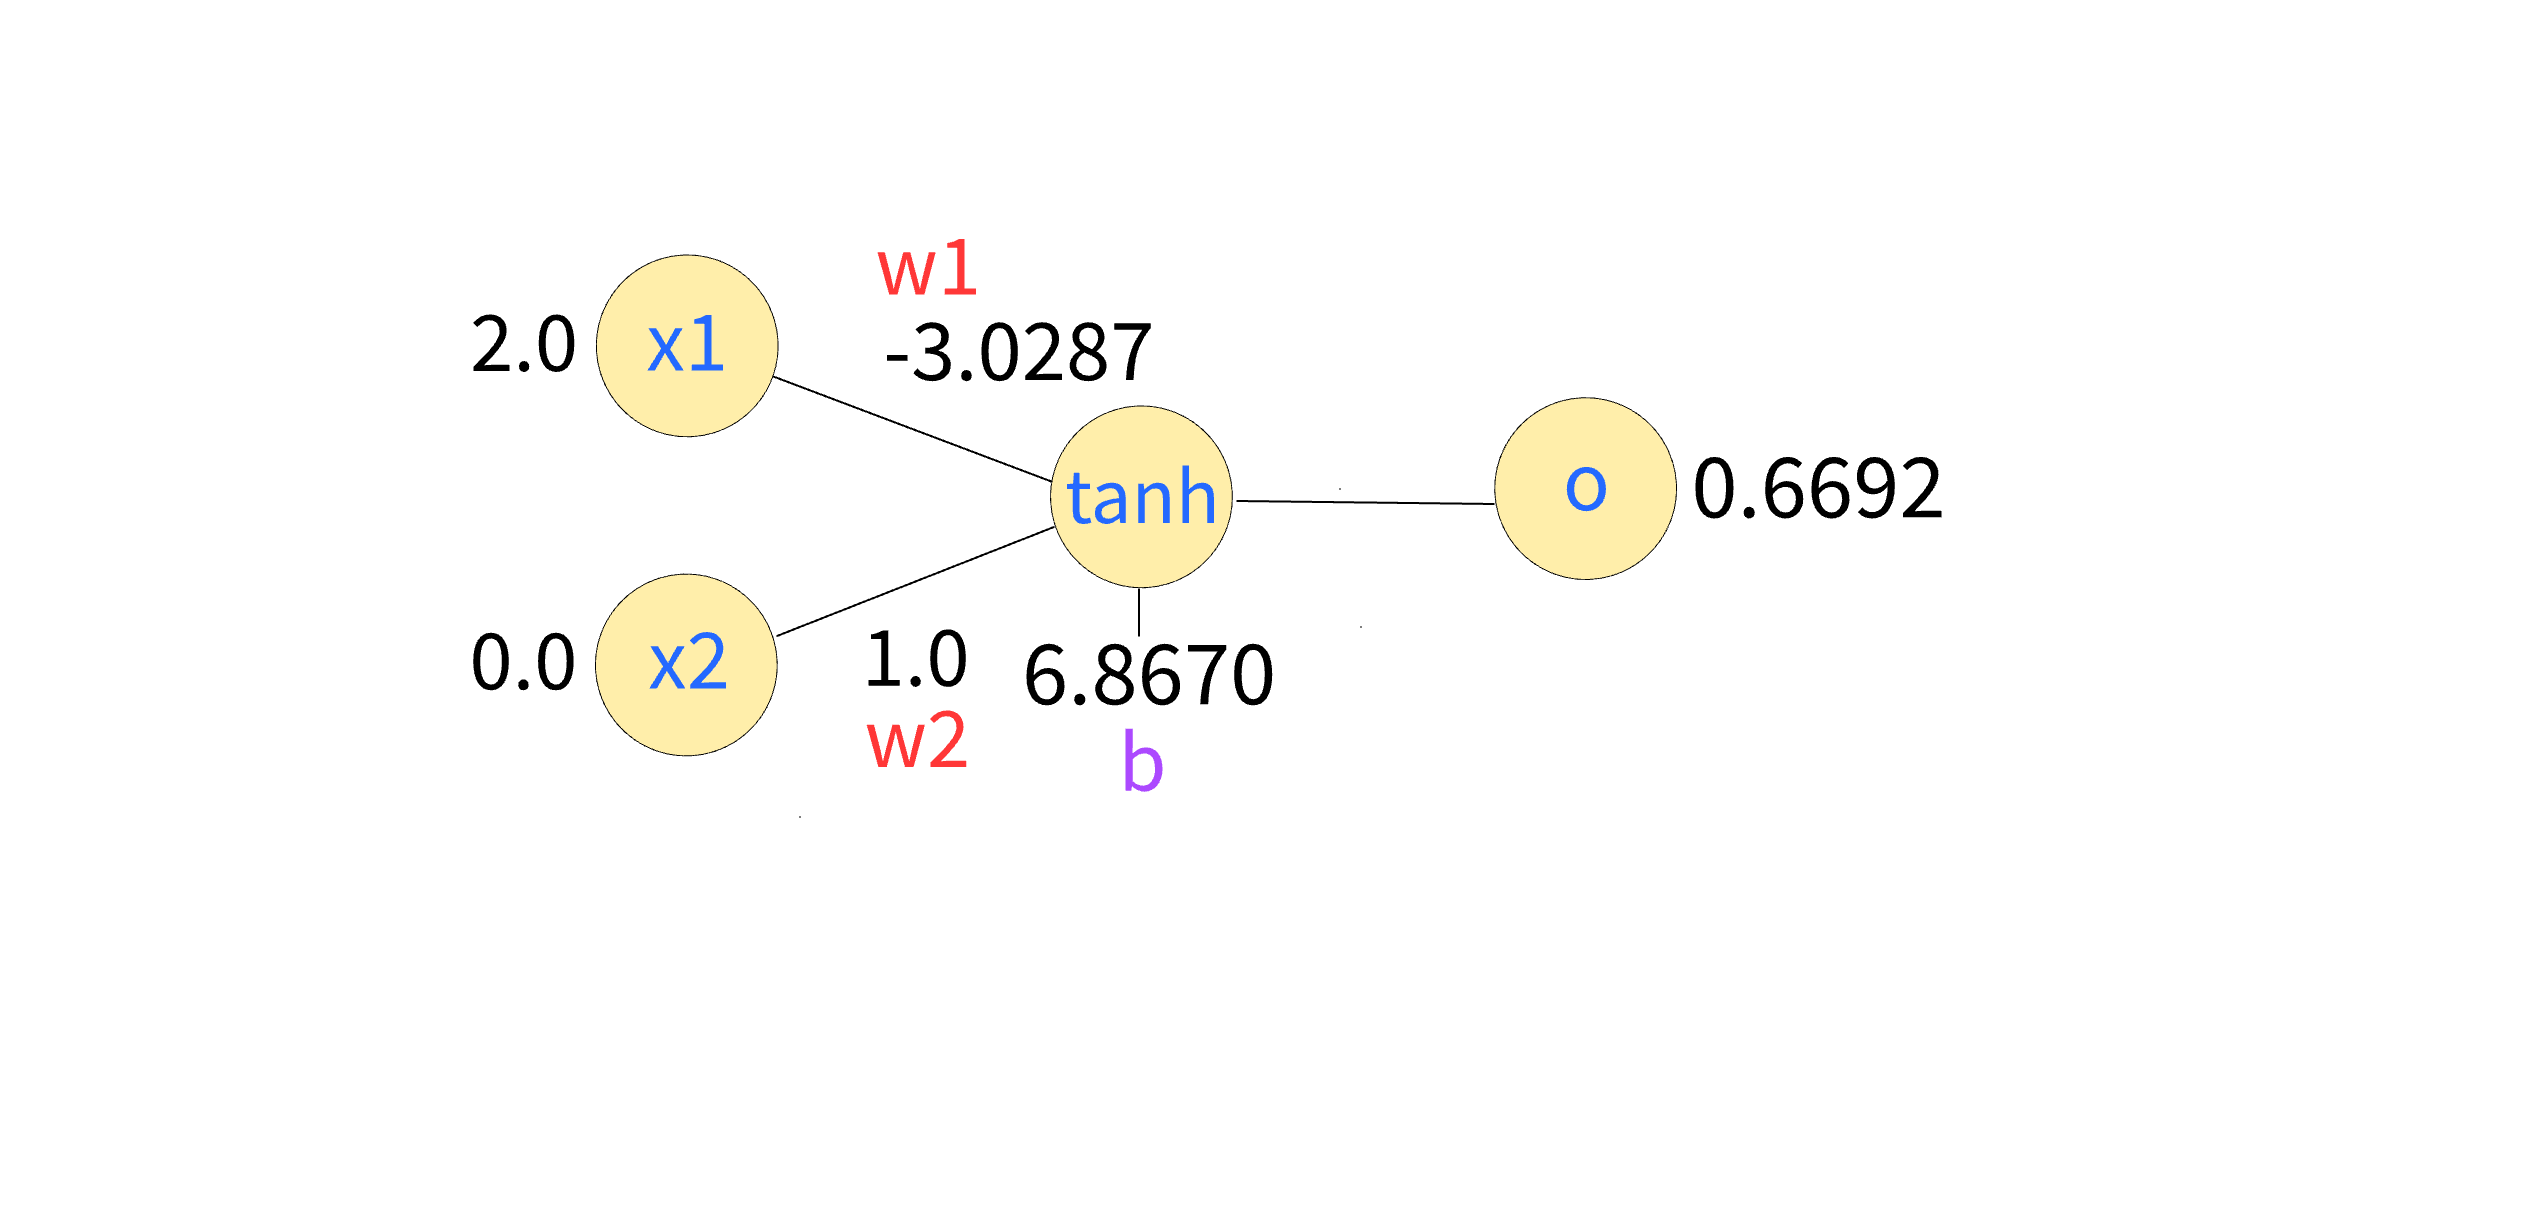

EPOCH 5
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.028784, w2 = 1.000000, b = 6.867008
STEP 1: FORWARD PASS
  forward pass:
    n = 0.809439 (n = 2.0*-3.0287844105263533 + 0.0*1.0 + 6.867007794736823)
    o = 0.669281 (o = tanh(0.8094389736841165))
    loss = 0.223968 (Loss = 0.5 * (0.6692806538042507 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.738971 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.369485 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.036174 (w1 = w1 - lr * w1.grad = -3.0361741176784696 - 0.01 * 0.7389707152116205)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.863313 (b = b - lr * b.grad = 6.863312941160765 - 0.01 * 0.36948535760581025)
 

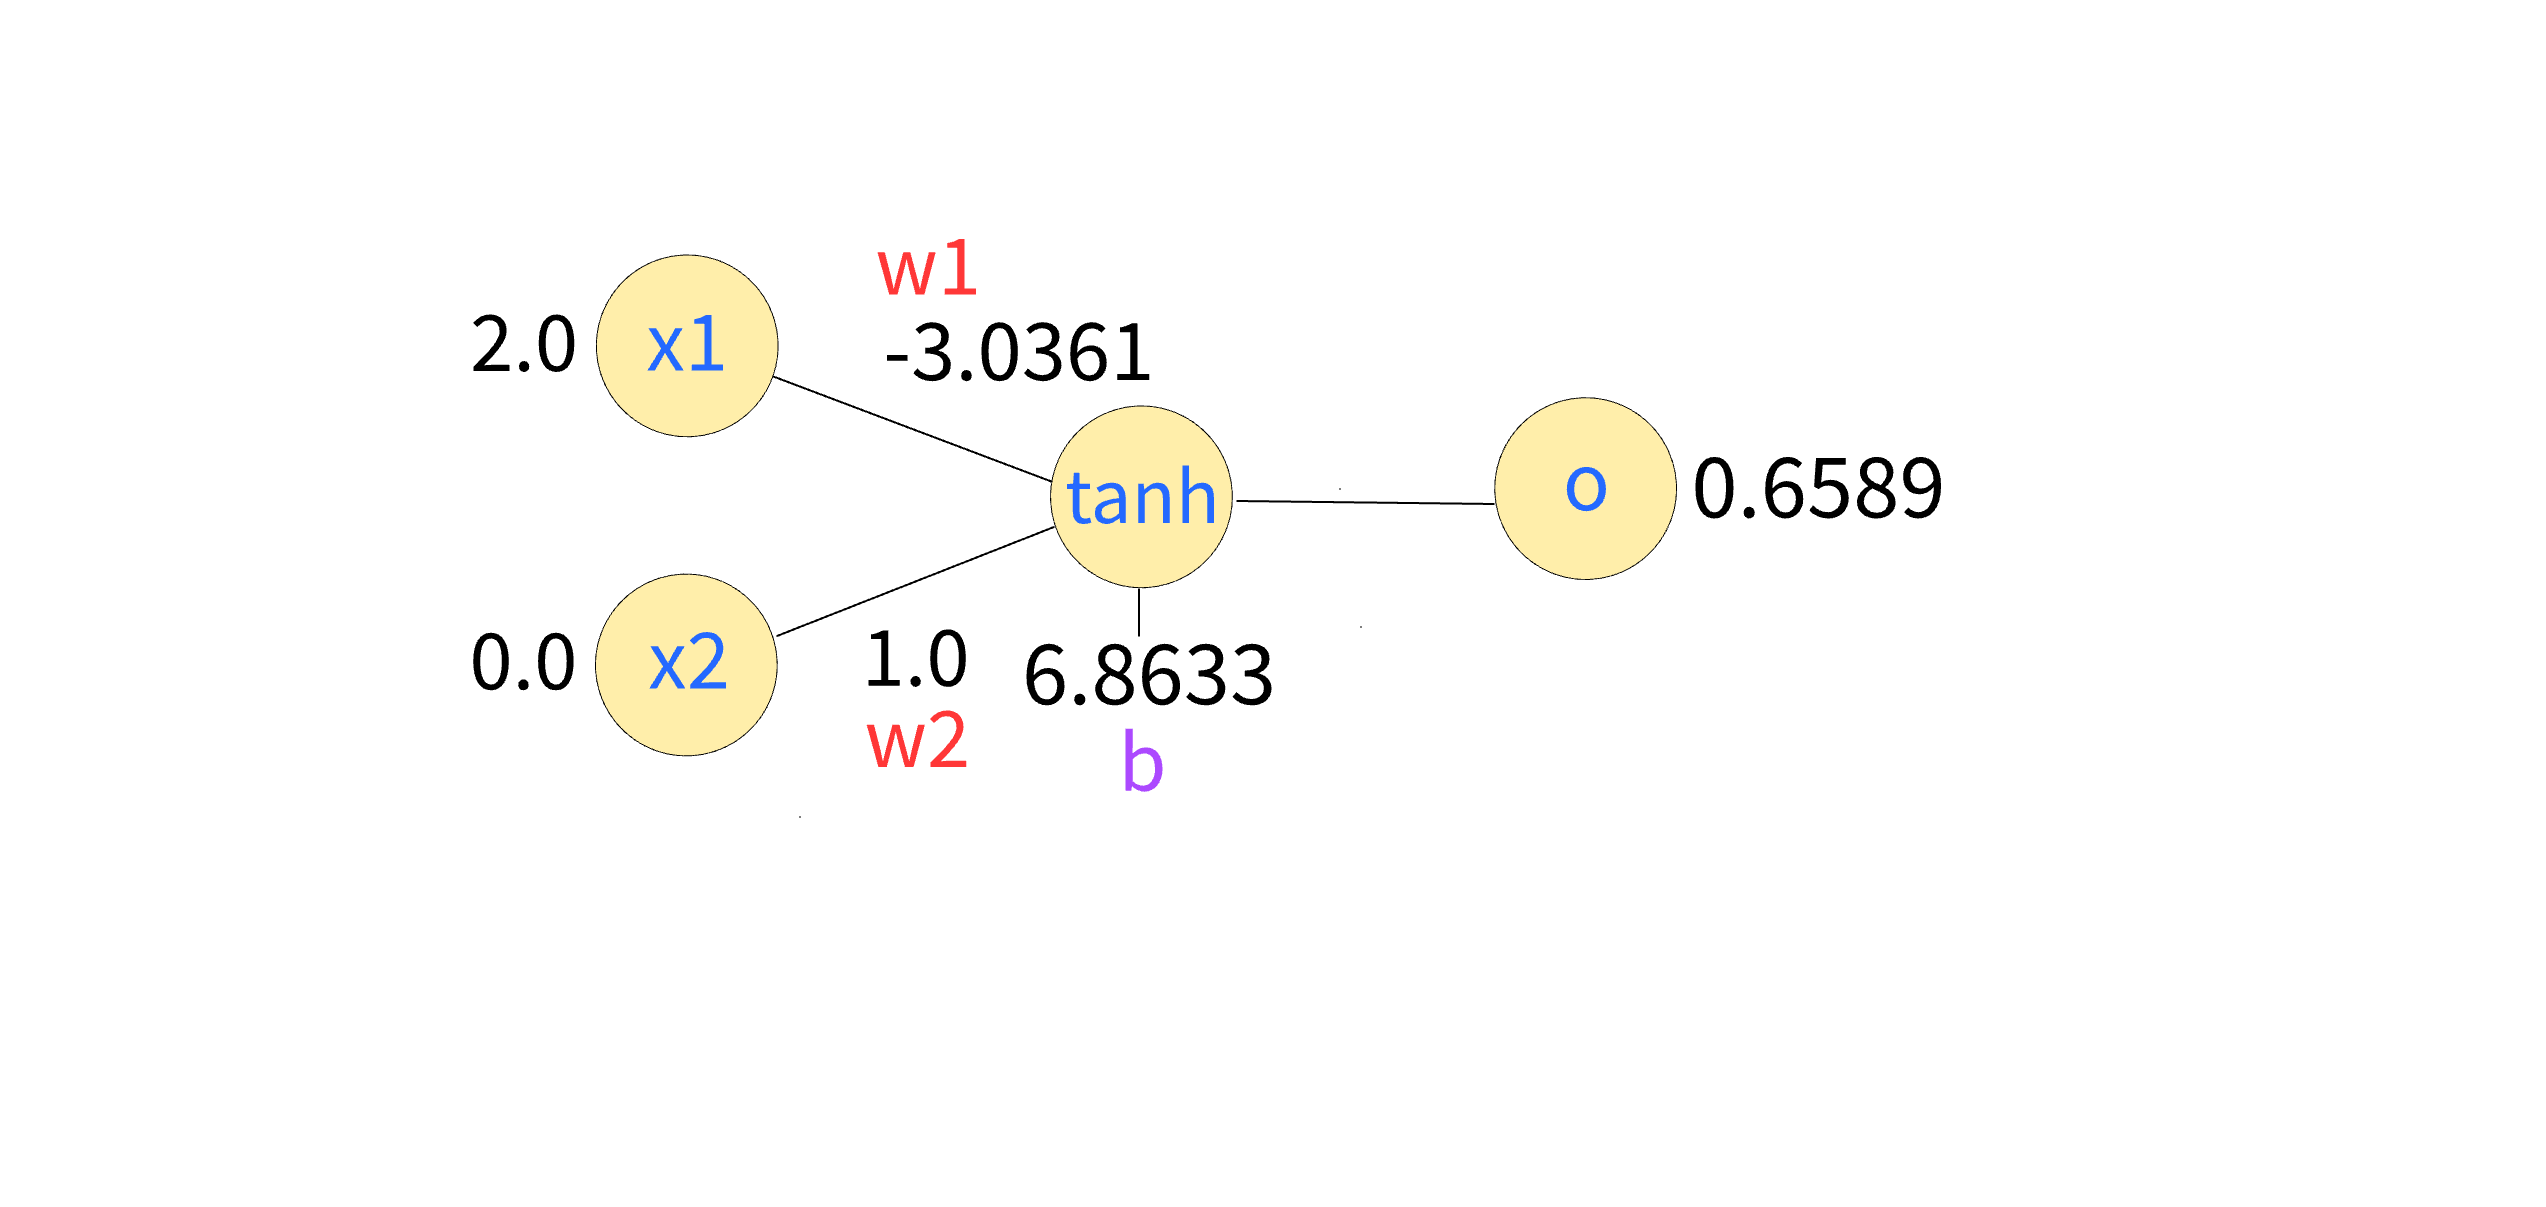

EPOCH 6
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.036174, w2 = 1.000000, b = 6.863313
STEP 1: FORWARD PASS
  forward pass:
    n = 0.790965 (n = 2.0*-3.0361741176784696 + 0.0*1.0 + 6.863312941160765)
    o = 0.658955 (o = tanh(0.7909647058038258))
    loss = 0.217111 (Loss = 0.5 * (0.6589551923491251 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.745645 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.372822 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.043631 (w1 = w1 - lr * w1.grad = -3.0436305654127542 - 0.01 * 0.7456447734284608)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.859585 (b = b - lr * b.grad = 6.859584717293623 - 0.01 * 0.3728223867142304)
  

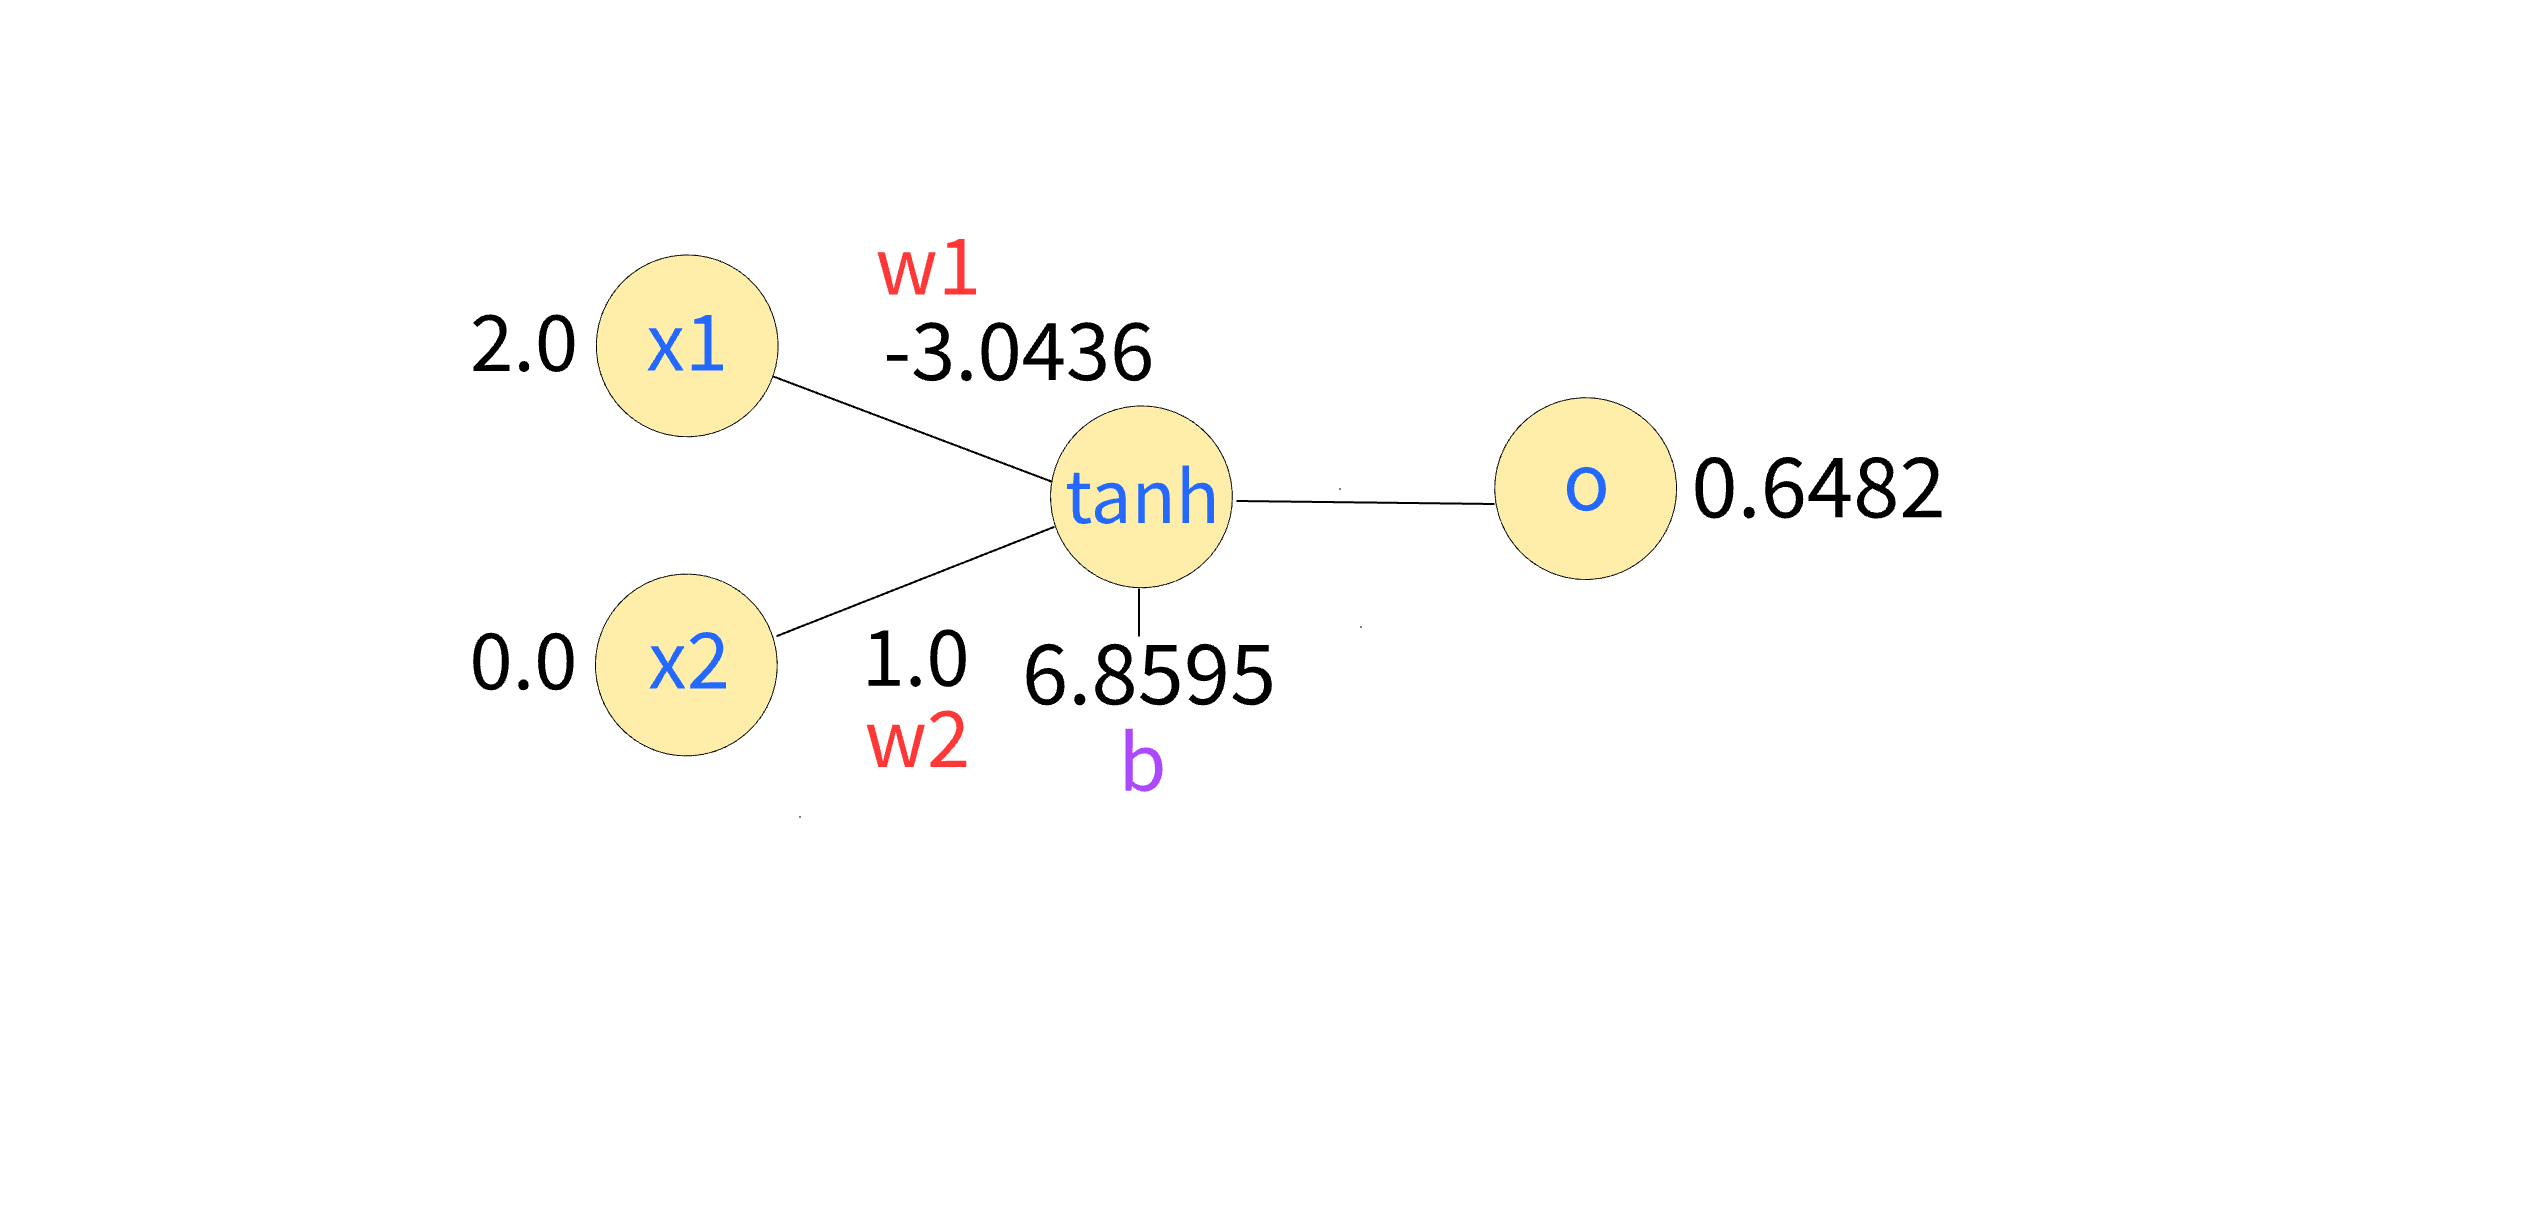

EPOCH 7
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.043631, w2 = 1.000000, b = 6.859585
STEP 1: FORWARD PASS
  forward pass:
    n = 0.772324 (n = 2.0*-3.0436305654127542 + 0.0*1.0 + 6.859584717293623)
    o = 0.648279 (o = tanh(0.7723235864681142))
    loss = 0.210133 (Loss = 0.5 * (0.6482785444319854 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.751659 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.375830 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.051147 (w1 = w1 - lr * w1.grad = -3.051147159729109 - 0.01 * 0.7516594316354793)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.855826 (b = b - lr * b.grad = 6.855826420135445 - 0.01 * 0.37582971581773966)
  

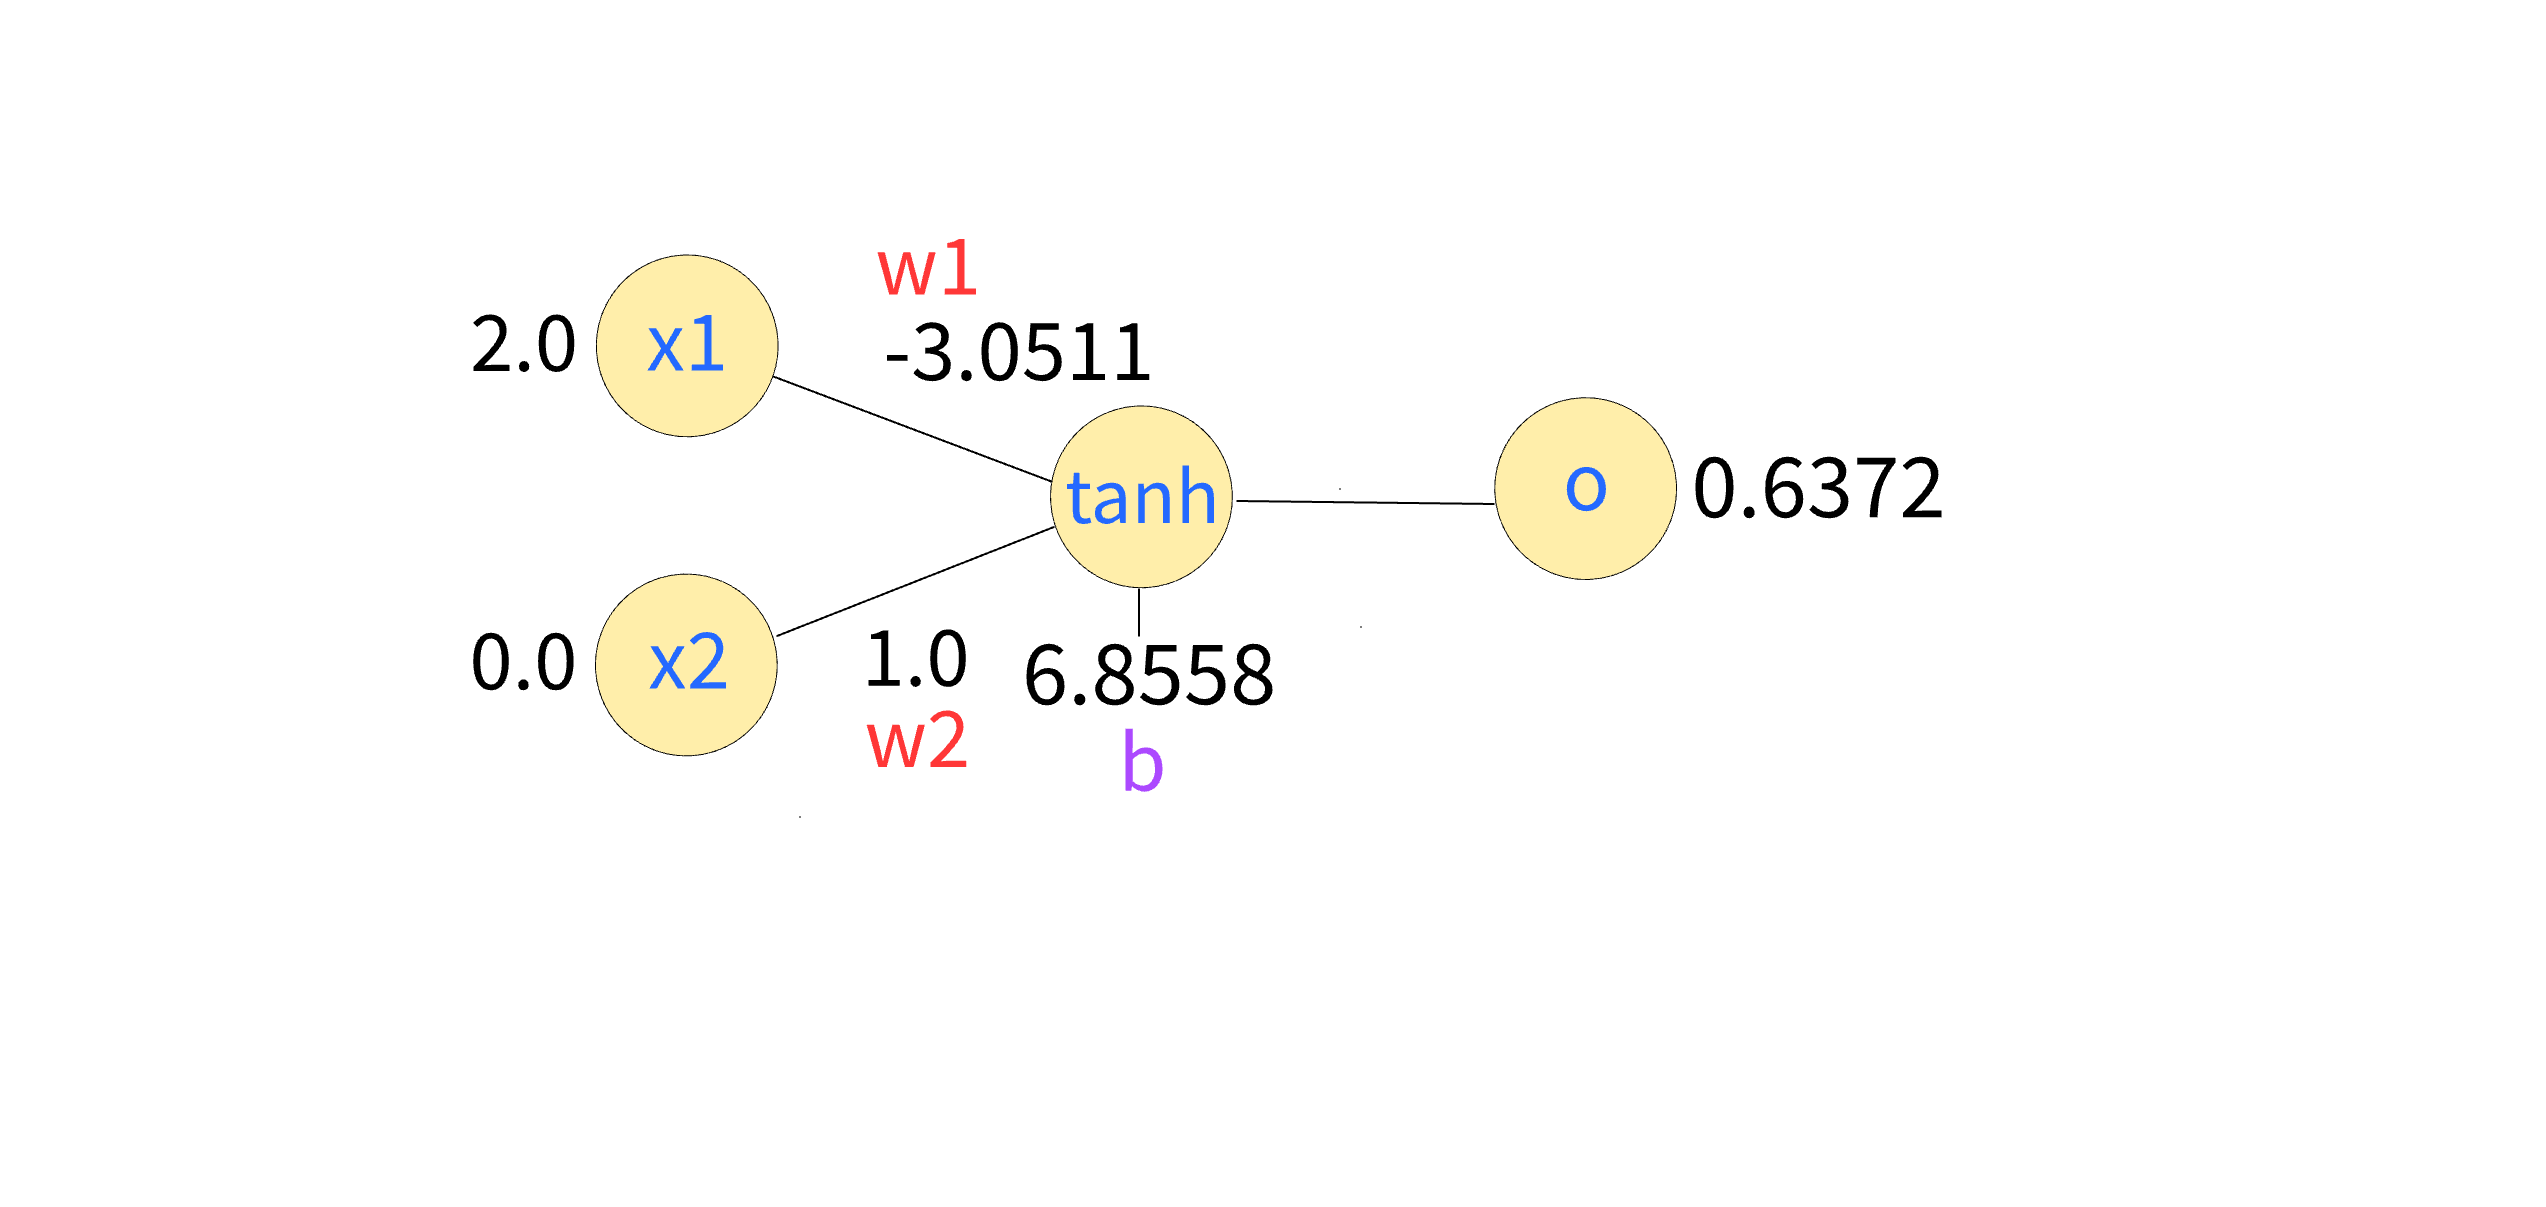

EPOCH 8
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.051147, w2 = 1.000000, b = 6.855826
STEP 1: FORWARD PASS
  forward pass:
    n = 0.753532 (n = 2.0*-3.051147159729109 + 0.0*1.0 + 6.855826420135445)
    o = 0.637251 (o = tanh(0.7535321006772273))
    loss = 0.203045 (Loss = 0.5 * (0.6372514280663818 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.756941 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.378470 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.058717 (w1 = w1 - lr * w1.grad = -3.0587165675110963 - 0.01 * 0.7569407781987396)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.852042 (b = b - lr * b.grad = 6.852041716244451 - 0.01 * 0.3784703890993698)
  u

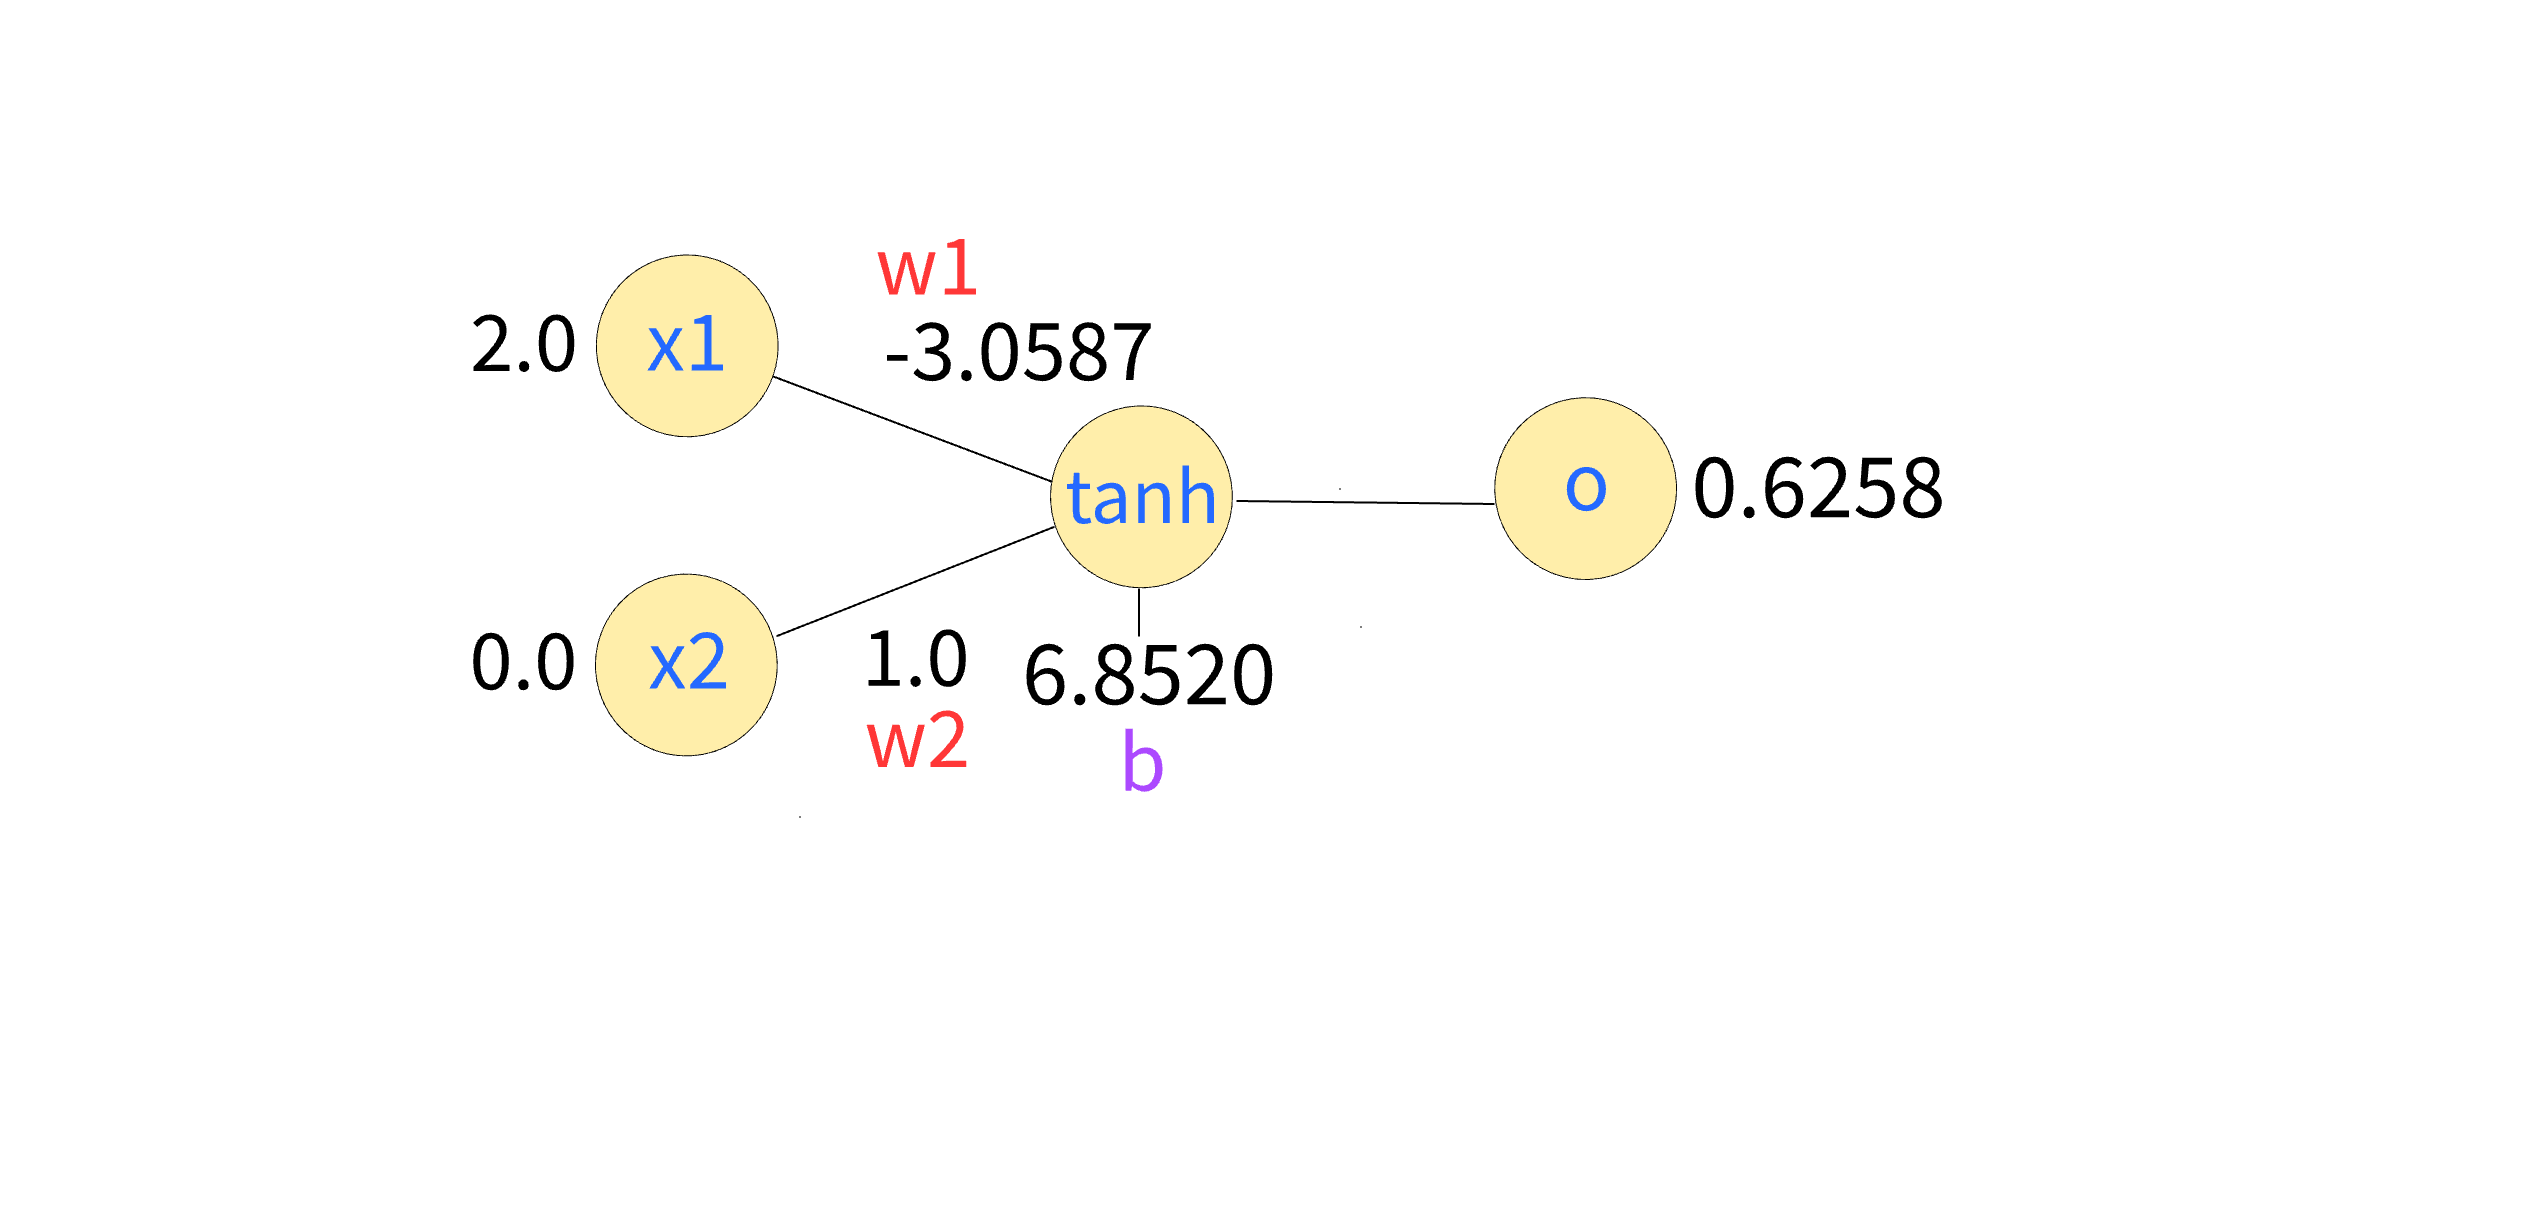

EPOCH 9
-------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.058717, w2 = 1.000000, b = 6.852042
STEP 1: FORWARD PASS
  forward pass:
    n = 0.734609 (n = 2.0*-3.0587165675110963 + 0.0*1.0 + 6.852041716244451)
    o = 0.625877 (o = tanh(0.7346085812222585))
    loss = 0.195861 (Loss = 0.5 * (0.6258767388376627 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.761414 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.380707 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.066331 (w1 = w1 - lr * w1.grad = -3.0663307123827015 - 0.01 * 0.7614144871604955)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.848235 (b = b - lr * b.grad = 6.848234643808649 - 0.01 * 0.38070724358024777)
 

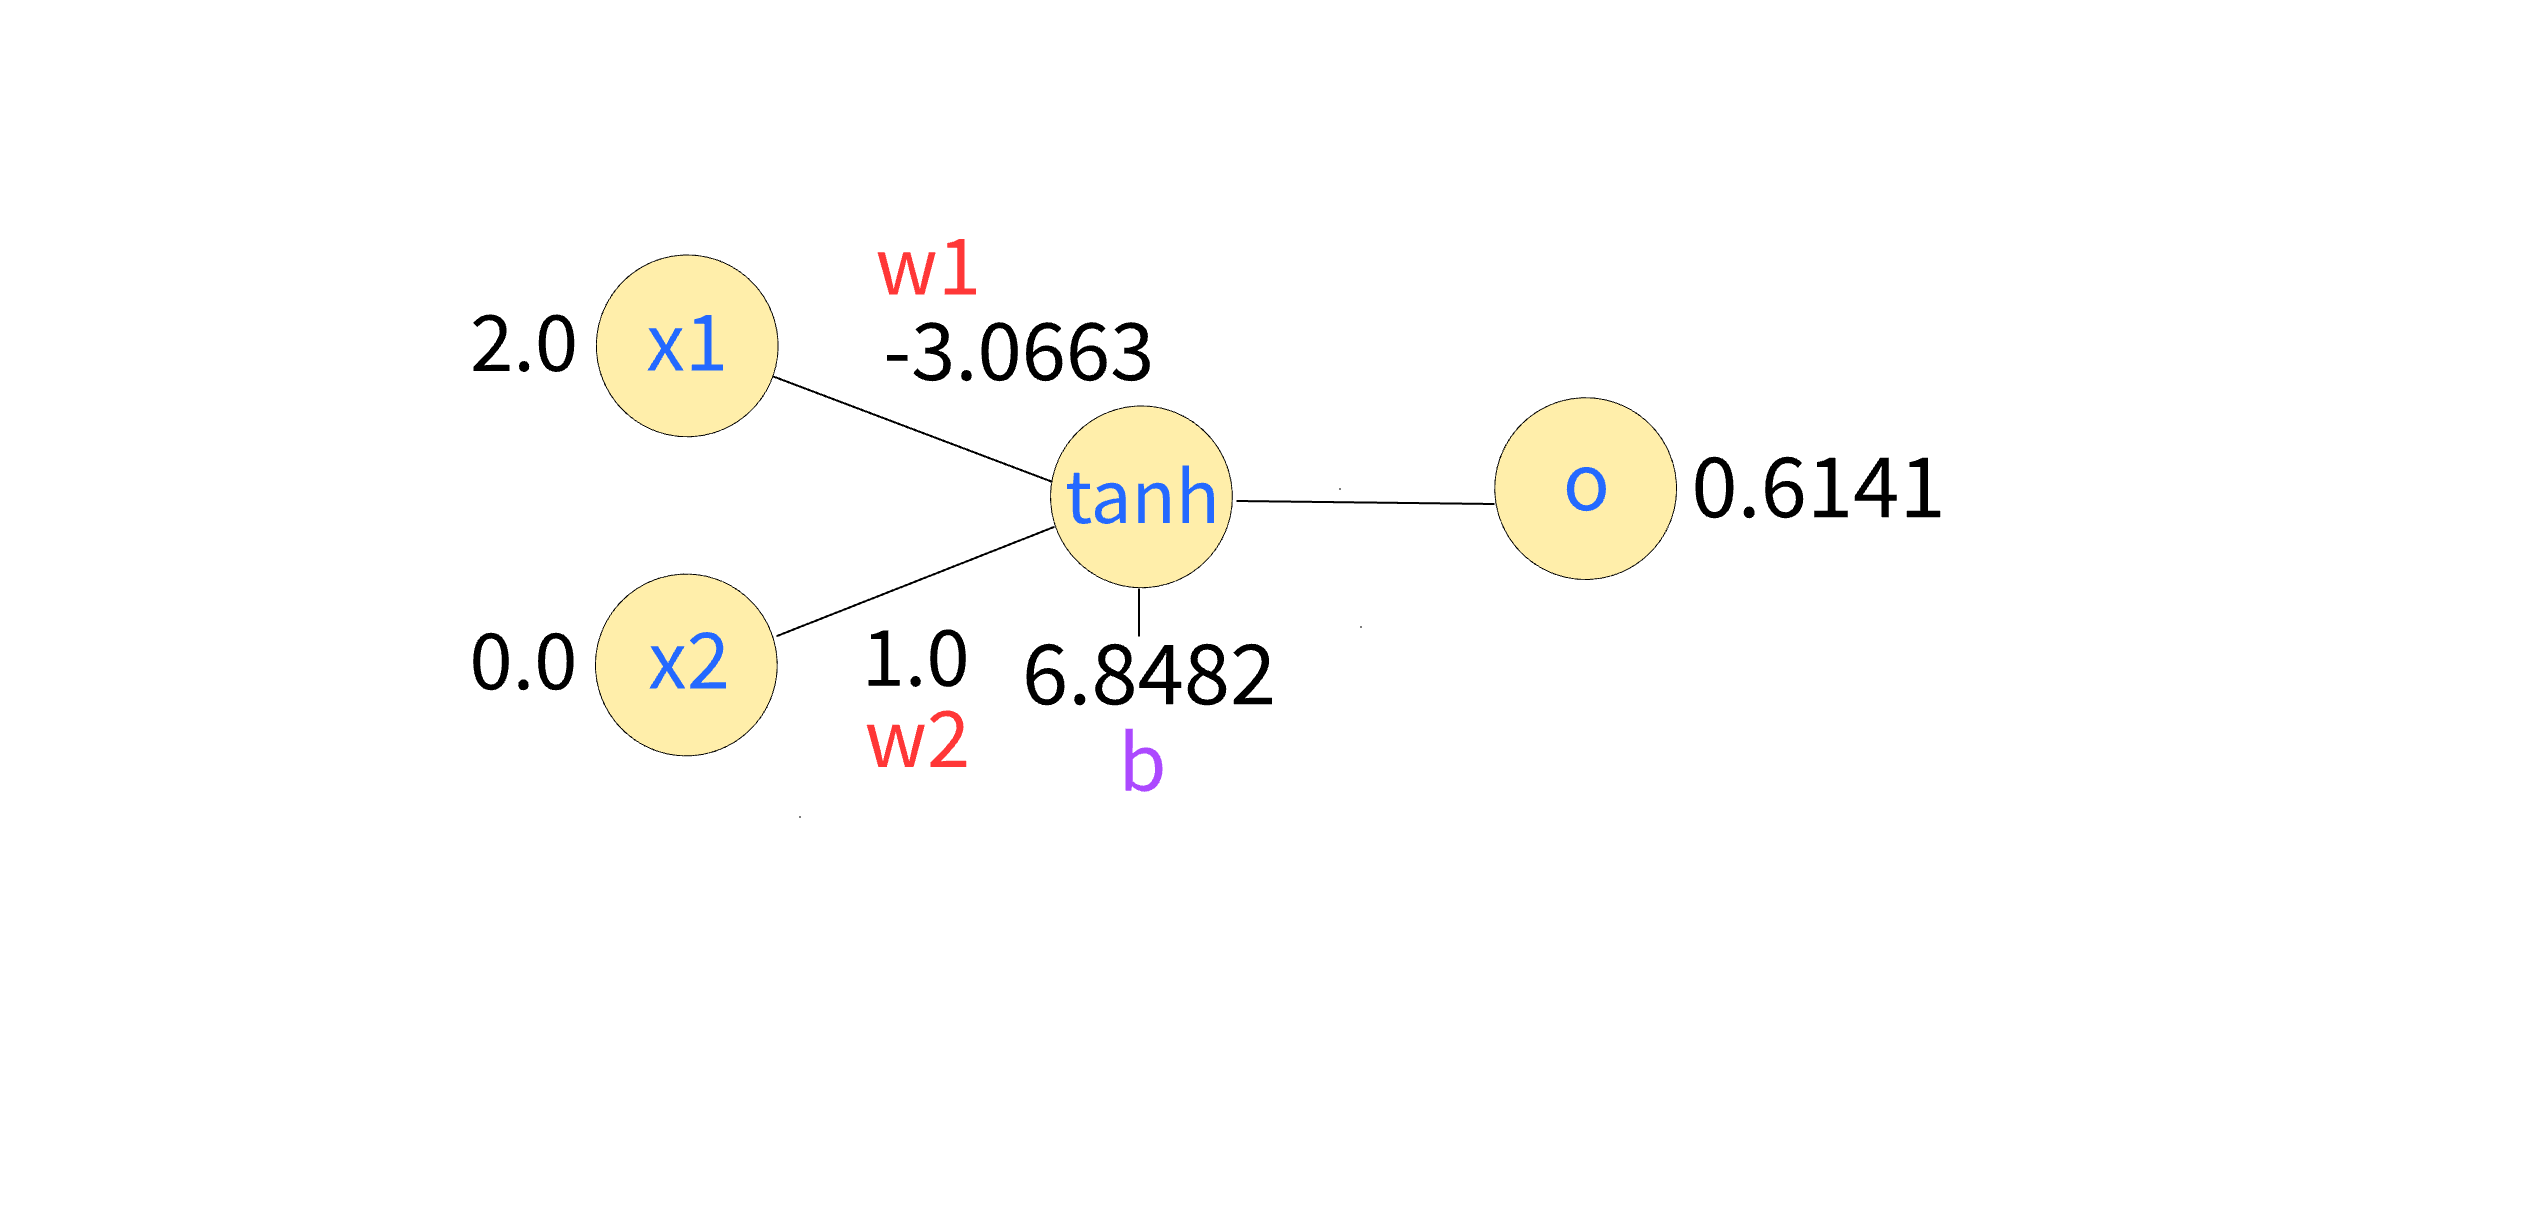

EPOCH 10
--------
STEP 0: INITIAL VALUES
  initial values:
    x1 = 2.0, x2 = 0.0
    w1 = -3.066331, w2 = 1.000000, b = 6.848235
STEP 1: FORWARD PASS
  forward pass:
    n = 0.715573 (n = 2.0*-3.0663307123827015 + 0.0*1.0 + 6.848234643808649)
    o = 0.614160 (o = tanh(0.7155732190432458))
    loss = 0.188596 (Loss = 0.5 * (0.6141597625050071 - 0.0)^2)
STEP 2: BACK PROPAGATION
  gradients (calculated during backward pass):
    w1.grad = 0.765007 (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))
    w2.grad = 0.000000 (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))
    b.grad = 0.382503 (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))
STEP 3: OPTIMIZATION / GRADIENT DESCENT
    updated w1 = -3.073981 (w1 = w1 - lr * w1.grad = -3.0739807820228937 - 0.01 * 0.765006964019203)
    updated w2 = 1.000000 (w2 = w2 - lr * w2.grad = 1.0 - 0.01 * 0.0)
    updated b = 6.844410 (b = b - lr * b.grad = 6.844409608988553 - 0.01 * 0.3825034820096015)
 

In [33]:
# iterate through 10 epochs
for epoch in range(epochs):
    
    # display the corresponding network diagram image
    display(Image(filename=f"ae{epoch}.png"))

    # forward pass: calculate n (linear combination) and o (output using tanh)
    n = x1 * w1 + x2 * w2 + b  # n = x1*w1 + x2*w2 + b
    o = torch.tanh(n)  # o = tanh(n)
    
    # calculate the loss using Mean Squared Error
    loss = 0.5 * (o - target).pow(2)  # loss = (1/2) * (o - target)^2

    # perform backward propagation to calculate gradients
    loss.backward()  # compute gradients for w1, w2, and b
    
    # log the current values and gradients
    print(f"EPOCH {epoch + 1}")
    if epoch + 1 == 10:
        print("--------")
    else:
        print("-------")
    print("STEP 0: INITIAL VALUES")
    print(f"  initial values:")
    print(f"    x1 = {x1.item()}, x2 = {x2.item()}")
    print(f"    w1 = {w1.item():.6f}, w2 = {w2.item():.6f}, b = {b.item():.6f}")
    print("STEP 1: FORWARD PASS")
    print(f"  forward pass:")
    print(f"    n = {n.item():.6f} (n = {x1.item()}*{w1.item()} + {x2.item()}*{w2.item()} + {b.item()})")
    print(f"    o = {o.item():.6f} (o = tanh({n.item()}))")
    print(f"    loss = {loss.item():.6f} (Loss = 0.5 * ({o.item()} - {target.item()})^2)")
    print("STEP 2: BACK PROPAGATION")
    print(f"  gradients (calculated during backward pass):")
    print(f"    w1.grad = {w1.grad.item():.6f} (gradient of loss w.r.t w1: dL/dw1 = x1 * (o - target) * (1 - o^2))")
    print(f"    w2.grad = {w2.grad.item():.6f} (gradient of loss w.r.t w2: dL/dw2 = x2 * (o - target) * (1 - o^2))")
    print(f"    b.grad = {b.grad.item():.6f} (gradient of loss w.r.t b: dL/db = (o - target) * (1 - o^2))")
    
    # update weights and bias using gradient descent
    with torch.no_grad():

        print("STEP 3: OPTIMIZATION / GRADIENT DESCENT")
        # explicitly show gradient descent calculation
        w1 -= learning_rate * w1.grad  # update w1
        print(f"    updated w1 = {w1.item():.6f} (w1 = w1 - lr * w1.grad = {w1.item()} - {learning_rate} * {w1.grad.item()})")
        w2 -= learning_rate * w2.grad  # update w2
        print(f"    updated w2 = {w2.item():.6f} (w2 = w2 - lr * w2.grad = {w2.item()} - {learning_rate} * {w2.grad.item()})")
        b -= learning_rate * b.grad    # update b
        print(f"    updated b = {b.item():.6f} (b = b - lr * b.grad = {b.item()} - {learning_rate} * {b.grad.item()})")

        # zero gradients for the next iteration
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()
        x1.grad.zero_()
        x2.grad.zero_()
    
    # log the updated weights and bias
    print(f"  updated parameters:")
    print(f"    w1 = {w1.item():.6f}, w2 = {w2.item():.6f}, b = {b.item():.6f}\n")

## Final Output

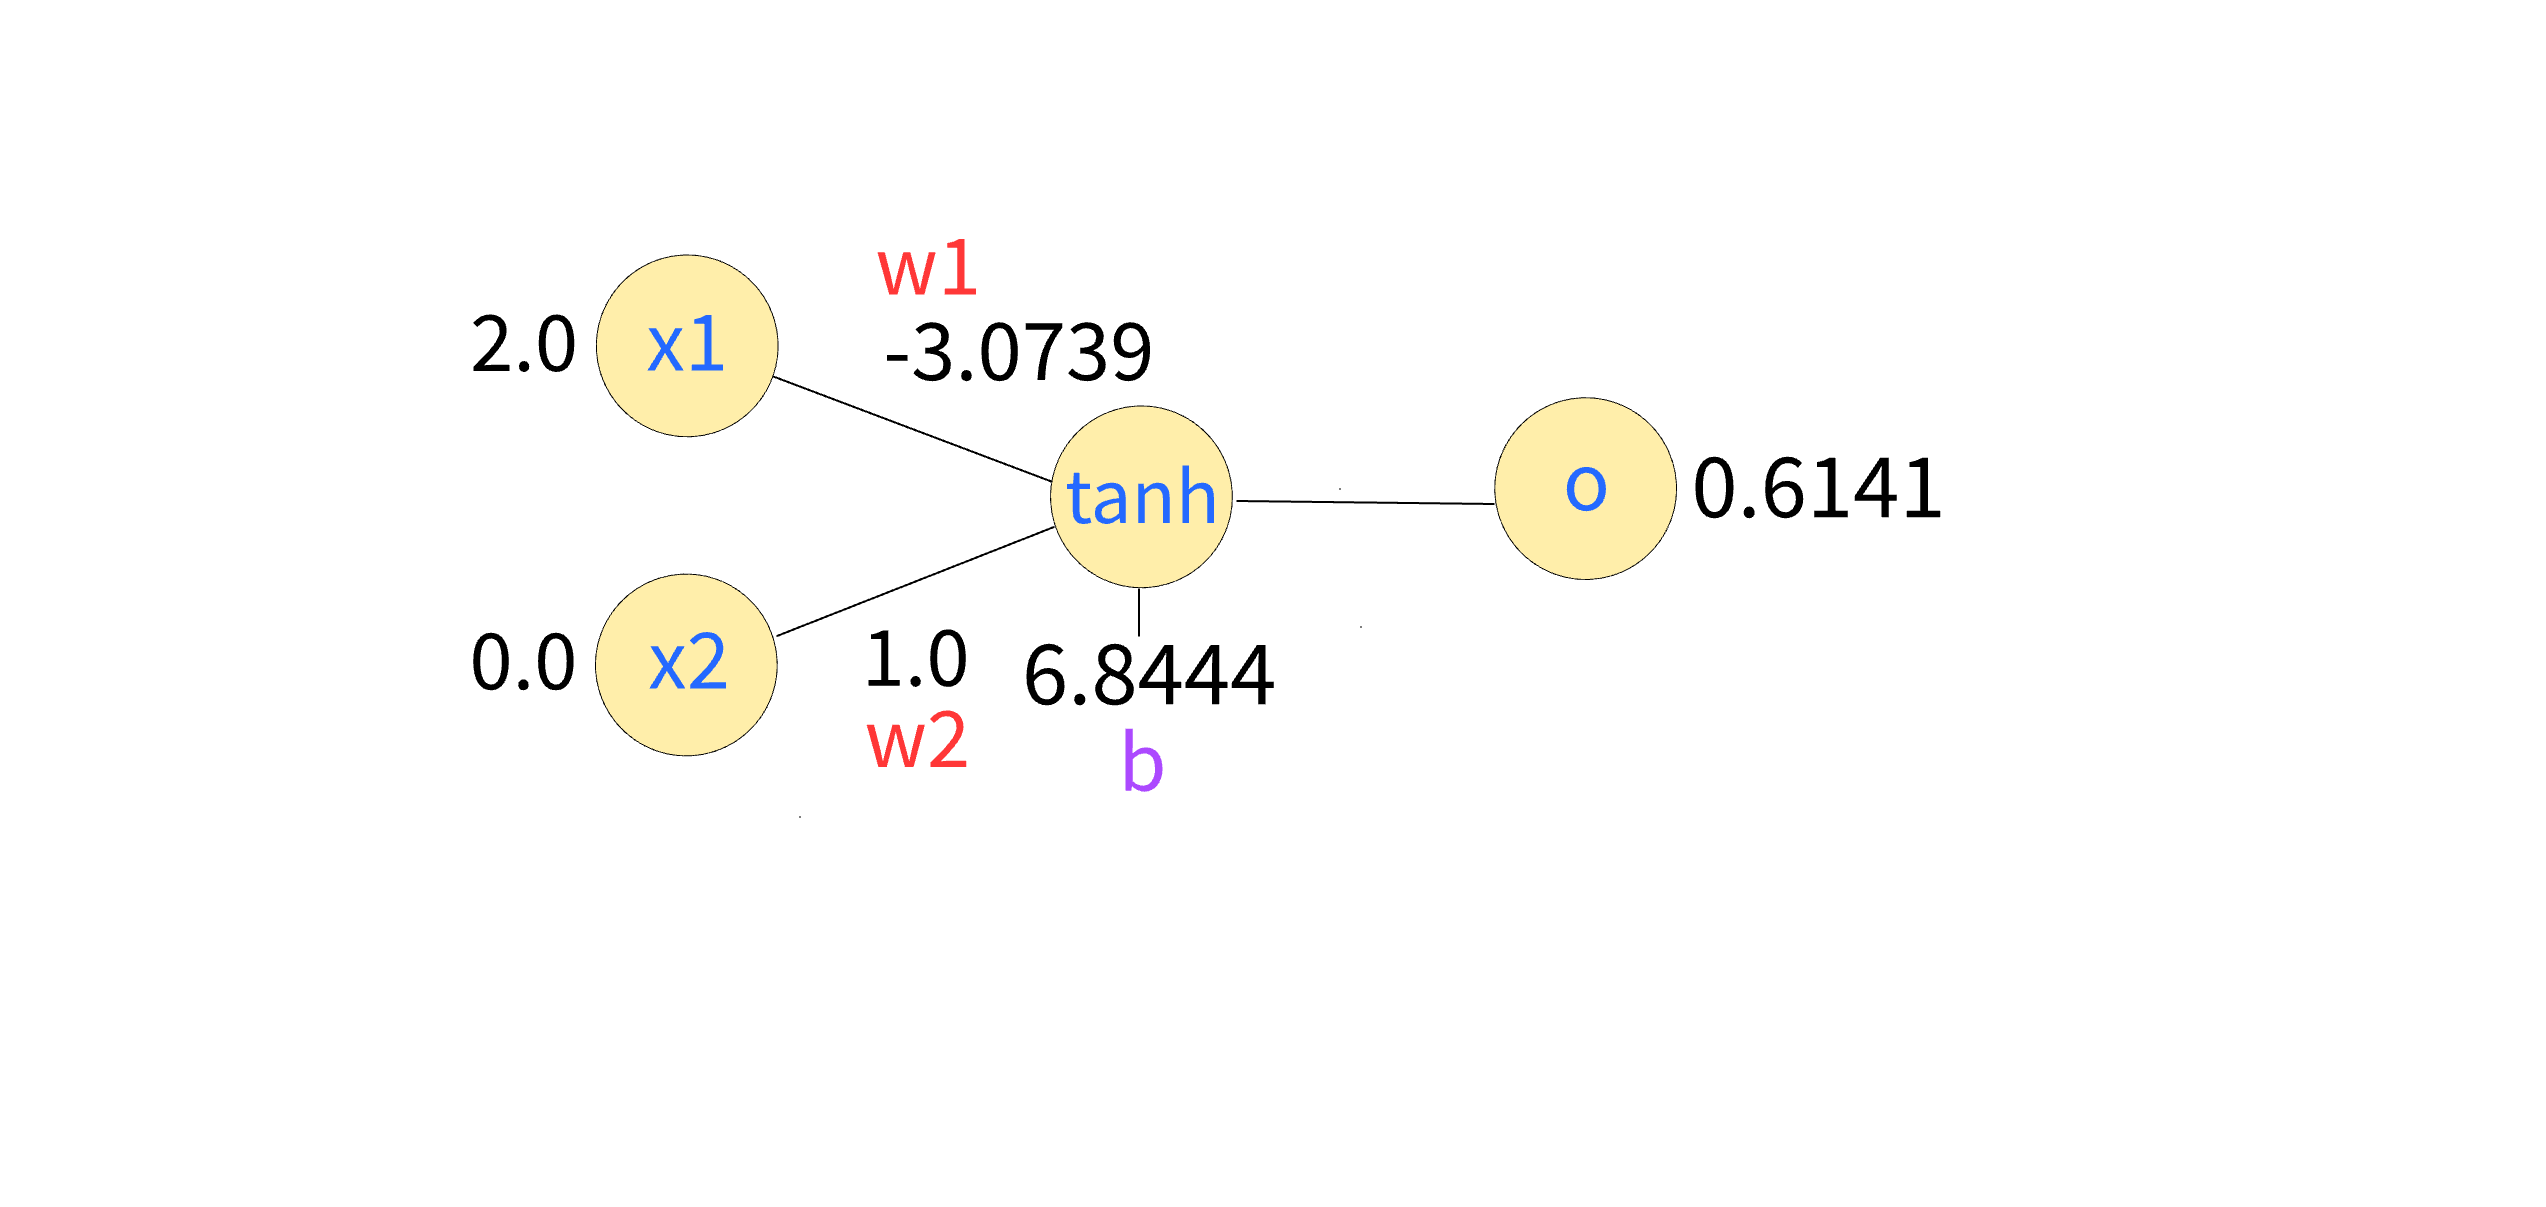


Final Output:
  Final n = 0.715573
  Final o = 0.614160 (o = tanh(0.7155732190432458))
  Final Loss = 0.188596
Final Parameters:
  w1 = -3.073981, w2 = 1.000000, b = 6.844410


In [34]:
# display the corresponding network diagram image
display(Image(filename=f"ae10.png"))

# final Output
print("\nFinal Output:")
print(f"  Final n = {n.item():.6f}")
print(f"  Final o = {o.item():.6f} (o = tanh({n.item()}))")
print(f"  Final Loss = {loss.item():.6f}")
print(f"Final Parameters:")
print(f"  w1 = {w1.item():.6f}, w2 = {w2.item():.6f}, b = {b.item():.6f}")